In [1]:
# Using Python 3.12.1 (local env: HeatNSalt)

import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Loading linear baseline
predictions_linear_all = pd.read_csv('outputs/Predictions/Linear_predictions_Log.csv')

# Loading CNNs trained on Biomass on Log and Log+1 transformed weights
predictions_raw =  pd.read_csv('outputs/Predictions/V1-EPT-14-biomass_efficientnet_b0_grouped_predictions_median.csv')
predictions_raw1 = pd.read_csv('outputs/Predictions/V1-EPT-14-biomass+1_efficientnet_b0_grouped_predictions_median.csv')
species_info = pd.read_excel('outputs/EPT-14-short-final.xlsx')

# Loading CNNs pre-trained on different taxonomic levels and trained additionally on Log and Log+1 transformed weights with frozen base
predictions_species = pd.read_csv('outputs/Predictions/fV1-EPT-14_Species_DNA_biomass_median.csv')
predictions_genus =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Genus_DNA_biomass_median.csv')
predictions_family =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Family_DNA_biomass_median.csv')
predictions_order =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Order_DNA_biomass_median.csv')

predictions_species1 = pd.read_csv('outputs/Predictions/fV1-EPT-14_Species_DNA_biomass+1_median.csv')
predictions_genus1 =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Genus_DNA_biomass+1_median.csv')
predictions_family1 =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Family_DNA_biomass+1_median.csv')
predictions_order1 =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Order_DNA_biomass+1_median.csv')


# Loading CNNs pre-trained on different taxonomic levels and trained additionally on Log and Log+1 transformed weights with unfrozen base
predictions_species_unf = pd.read_csv('outputs/Predictions/fV1-EPT-14_Species_DNA-unfrozen_biomass_median.csv')
predictions_genus_unf =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Genus_DNA-unfrozen_biomass_median.csv')
predictions_family_unf =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Family_DNA-unfrozen_biomass_median.csv')
predictions_order_unf =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Order_DNA-unfrozen_biomass_median.csv')

predictions_species_unf1 = pd.read_csv('outputs/Predictions/fV1-EPT-14_Species_DNA-unfrozen_biomass+1_median.csv')
predictions_genus_unf1 =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Genus_DNA-unfrozen_biomass+1_median.csv')
predictions_family_unf1 =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Family_DNA-unfrozen_biomass+1_median.csv')
predictions_order_unf1 =  pd.read_csv('outputs/Predictions/fV1-EPT-14_Order_DNA-unfrozen_biomass+1_median.csv')

In [3]:
## Loading CNNs trained on different taxonomic levels: 
## (Not needed right now, since visualization with confusion matrices needs sklearn, which could only be successfully installed on the DL server (due to a local ARM / Intel version problem))
predictions_species_classification = pd.read_csv('outputs/Predictions/fV1-EPT-14-Species_DNA_efficientnet_b0_grouped_predictions.csv')
#predictions_genus_classification =  pd.read_csv('outputs/Predictions/fV1-EPT-14-Genus_DNA_efficientnet_b0_grouped_predictions.csv')
#predictions_family_classification =  pd.read_csv('outputs/Predictions/fV1-EPT-14-Family_DNA_efficientnet_b0_grouped_predictions.csv')
predictions_order_classification =  pd.read_csv('outputs/Predictions/fV1-EPT-14-Order_DNA_efficientnet_b0_grouped_predictions.csv')

In [4]:
predictions_linear_dict = {}
for input in predictions_linear_all['key'].unique():
    predictions_linear_dict[input] = predictions_linear_all.loc[predictions_linear_all['key'] == input]

In [5]:
species_info[['Specimen ID', 'Species_DNA', 'Order_DNA']]

Specimen ID                 Species_DNA      Order_DNA
0         4_F12                Goera pilosa    Trichoptera
1          4_G3  Potamophylax rotundipennis    Trichoptera
2          4_G4               Baetis vernus  Ephemeroptera
3          4_G5              Baetis rhodani  Ephemeroptera
4          4_G6              Caenis horaria  Ephemeroptera
..          ...                         ...            ...
738       10_C7              Baetis rhodani  Ephemeroptera
739       10_C8              Baetis rhodani  Ephemeroptera
740       10_C9              Baetis rhodani  Ephemeroptera
741      10_C10              Baetis rhodani  Ephemeroptera
742      10_C11             Nemoura cinerea     Plecoptera

[743 rows x 3 columns]

In [6]:
def merge_species(input_df):
    output_df = pd.merge(input_df, species_info[['Specimen ID', 'Species_DNA', 'Order_DNA']], left_on='individual', right_on='Specimen ID', how='left')
    return output_df

In [7]:
for name, dataframe in predictions_linear_dict.items():
    predictions_linear_dict[name] = merge_species(dataframe)

predictions_raw_plus =  merge_species(predictions_raw)
predictions_raw1_plus = merge_species(predictions_raw1)

predictions_species_plus = merge_species(predictions_species)
predictions_genus_plus =  merge_species(predictions_genus)
predictions_family_plus =  merge_species(predictions_family)
predictions_order_plus =  merge_species(predictions_order)

predictions_species_plus1 = merge_species(predictions_species1)
predictions_genus_plus1 =  merge_species(predictions_genus1)
predictions_family_plus1 =  merge_species(predictions_family1)
predictions_order_plus1 =  merge_species(predictions_order1)

predictions_species_unf_plus = merge_species(predictions_species_unf)
predictions_genus_unf_plus = merge_species(predictions_genus_unf)
predictions_family_unf_plus = merge_species(predictions_family_unf)
predictions_order_unf_plus = merge_species(predictions_order_unf)

predictions_species_unf_plus1 = merge_species(predictions_species_unf1)
predictions_genus_unf_plus1 = merge_species(predictions_genus_unf1)
predictions_family_unf_plus1 = merge_species(predictions_family_unf1)
predictions_order_unf_plus1 = merge_species(predictions_order_unf1)

In [8]:
import numpy as np

In [9]:
for name, dataframe in predictions_linear_dict.items():
    if 'Log' in name:
        if '1Log' in name:
            predictions_linear_dict[name] = dataframe.rename(columns={'actual': 'Log+1_weights', 'predicted': 'y_pred'})
            predictions_linear_dict[name]['Weights'] = np.exp(predictions_linear_dict[name]['Log+1_weights'])-1
            predictions_linear_dict[name]['Weights_pred'] = np.exp(predictions_linear_dict[name]['y_pred'])-1
        else:
            predictions_linear_dict[name] = dataframe.rename(columns={'actual': 'Log_weights', 'predicted': 'y_pred'})
            predictions_linear_dict[name]['Weights'] = np.exp(predictions_linear_dict[name]['Log_weights'])
            predictions_linear_dict[name]['Weights_pred'] = np.exp(predictions_linear_dict[name]['y_pred'])
    else:
        predictions_linear_dict[name] = dataframe.rename(columns={'actual': 'Weights', 'predicted': 'y_pred'})
        predictions_linear_dict[name]['Weights_pred'] = predictions_linear_dict[name]['y_pred']

In [10]:
predictions_list = [predictions_species_plus, predictions_genus_plus, predictions_family_plus, predictions_order_plus, predictions_raw_plus]
predictions_list_unf = [predictions_species_unf_plus, predictions_genus_unf_plus, predictions_family_unf_plus, predictions_order_unf_plus, predictions_raw_plus]

for prediction in predictions_list:
    prediction['Weights'] = np.exp(prediction['Log_weights'])
    prediction['Weights_pred'] = np.exp(prediction['y_pred'])

for prediction in predictions_list_unf:
    prediction['Weights'] = np.exp(prediction['Log_weights'])
    prediction['Weights_pred'] = np.exp(prediction['y_pred'])

In [11]:
predictions_list1 = [predictions_species_plus1, predictions_genus_plus1, predictions_family_plus1, predictions_order_plus1]
predictions_list_unf1 = [predictions_species_unf_plus1, predictions_genus_unf_plus1, predictions_family_unf_plus1, predictions_order_unf_plus1]

for prediction in predictions_list1:
    prediction['Weights'] = np.exp(prediction['Log+1_weights'])-1
    prediction['Weights_pred'] = np.exp(prediction['y_pred'])-1

for prediction in predictions_list_unf1:
    prediction['Weights'] = np.exp(prediction['Log+1_weights'])-1
    prediction['Weights_pred'] = np.exp(prediction['y_pred'])-1

In [12]:
predictions_raw1_plus['Weights'] = np.exp(predictions_raw1_plus['Log+1_weights'])-1
predictions_raw1_plus['Weights_pred'] = np.exp(predictions_raw1_plus['y_pred'])-1

In [13]:
predictions_raw1_plus

individual  Log+1_weights    y_pred Specimen ID  \
0       10_A10       0.039221  0.323665      10_A10   
1       10_A11       0.463734  0.614420      10_A11   
2        10_A2       0.207014  0.709351       10_A2   
3        10_A3       0.329304  0.724183       10_A3   
4        10_A4       2.026832  2.329177       10_A4   
..         ...            ...       ...         ...   
738       9_H5       3.684620  3.036638        9_H5   
739       9_H6       1.678964  0.100564        9_H6   
740       9_H7       0.494696  0.281494        9_H7   
741       9_H8       0.970779  0.659556        9_H8   
742       9_H9       4.849214  4.879861        9_H9   

                    Species_DNA      Order_DNA  Weights  Weights_pred  
0          Athripsodes cinereus    Trichoptera     0.04      0.382184  
1                  Goera pilosa    Trichoptera     0.59      0.848583  
2                 Baetis vernus  Ephemeroptera     0.23      1.032672  
3                Baetis rhodani  Ephemeroptera     0.39      1.063044  
4               Ephemera danica  Ephemeroptera     6.59      9.269486  
..                          ...            ...      ...           ...  
738                Goera pilosa    Trichoptera    38.83     19.835076  
739        Athripsodes cinereus    Trichoptera     4.36      0.105794  
740         Limnephilus lunatus    Trichoptera     0.64      0.325108  
741         Limnephilus lunatus    Trichoptera     1.64      0.933934  
742  Potamophylax rotundipennis    Trichoptera   126.64    130.612421  

[743 rows x 8 columns]

In [14]:
predictions_raw_plus

individual  Log_weights    y_pred Specimen ID                 Species_DNA  \
0       10_A10    -3.218876 -0.780557      10_A10        Athripsodes cinereus   
1       10_A11    -0.527633 -0.193001      10_A11                Goera pilosa   
2        10_A2    -1.469676 -0.718013       10_A2               Baetis vernus   
3        10_A3    -0.941609  0.138850       10_A3              Baetis rhodani   
4        10_A4     1.885553  2.182730       10_A4             Ephemera danica   
..         ...          ...       ...         ...                         ...   
738       9_H5     3.659193  3.020454        9_H5                Goera pilosa   
739       9_H6     1.472472 -2.857707        9_H6        Athripsodes cinereus   
740       9_H7    -0.446287 -0.988558        9_H7         Limnephilus lunatus   
741       9_H8     0.494696 -0.063677        9_H8         Limnephilus lunatus   
742       9_H9     4.841348  4.930390        9_H9  Potamophylax rotundipennis   

         Order_DNA  Weights  Weights_pred  
0      Trichoptera     0.04      0.458151  
1      Trichoptera     0.59      0.824481  
2    Ephemeroptera     0.23      0.487721  
3    Ephemeroptera     0.39      1.148952  
4    Ephemeroptera     6.59      8.870491  
..             ...      ...           ...  
738    Trichoptera    38.83     20.500604  
739    Trichoptera     4.36      0.057400  
740    Trichoptera     0.64      0.372113  
741    Trichoptera     1.64      0.938308  
742    Trichoptera   126.64    138.433491  

[743 rows x 8 columns]

In [15]:
max(predictions_raw_plus['Weights'])

211.63000000000017

In [16]:
species_info

Specimen ID Channel  Specimen Weight  Log_weights  Log+1_weights  \
0         4_F12     C25            14.83     2.696652       2.761907   
1          4_G3     C25           106.30     4.666265       4.675629   
2          4_G4     C25             1.26     0.231112       0.815365   
3          4_G5     C25             1.26     0.231112       0.815365   
4          4_G6     C25             1.43     0.357674       0.887891   
..          ...     ...              ...          ...            ...   
738       10_C7     C64             0.04    -3.218876       0.039221   
739       10_C8     C64             0.27    -1.309333       0.239017   
740       10_C9     C64             0.04    -3.218876       0.039221   
741      10_C10     C64             0.13    -2.040221       0.122218   
742      10_C11     C64             3.11     1.134623       1.413423   

      Order_Morpho    Type  OTU_DNA      Order_DNA     Family_DNA  \
0      Trichoptera  T_with   >OTU_2    Trichoptera       Goeridae   
1      Trichoptera  T_with   >OTU_3    Trichoptera  Limnephilidae   
2    Ephemeroptera       E  >OTU_15  Ephemeroptera       Baetidae   
3    Ephemeroptera       E   >OTU_5  Ephemeroptera       Baetidae   
4    Ephemeroptera       E   >OTU_9  Ephemeroptera       Caenidae   
..             ...     ...      ...            ...            ...   
738  Ephemeroptera       E   >OTU_5  Ephemeroptera       Baetidae   
739  Ephemeroptera       E   >OTU_5  Ephemeroptera       Baetidae   
740  Ephemeroptera       E   >OTU_5  Ephemeroptera       Baetidae   
741  Ephemeroptera       E   >OTU_5  Ephemeroptera       Baetidae   
742     Plecoptera       P  >OTU_12     Plecoptera     Nemouridae   

        Genus_DNA                 Species_DNA                   Label_DNA  \
0           Goera                Goera pilosa                Goera pilosa   
1    Potamophylax  Potamophylax rotundipennis  Potamophylax rotundipennis   
2          Baetis               Baetis vernus               Baetis vernus   
3          Baetis              Baetis rhodani              Baetis rhodani   
4          Caenis              Caenis horaria              Caenis horaria   
..            ...                         ...                         ...   
738        Baetis              Baetis rhodani              Baetis rhodani   
739        Baetis              Baetis rhodani              Baetis rhodani   
740        Baetis              Baetis rhodani              Baetis rhodani   
741        Baetis              Baetis rhodani              Baetis rhodani   
742       Nemoura             Nemoura cinerea             Nemoura cinerea   

     read count_DNA  
0            215998  
1            294532  
2            178119  
3            354925  
4            245059  
..              ...  
738          377678  
739          263295  
740          435374  
741          268863  
742          314403  

[743 rows x 14 columns]

In [17]:
print(species_info['Specimen Weight'].min())
print(species_info['Specimen Weight'].max())

0.01999999999998181
211.6300000000001


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

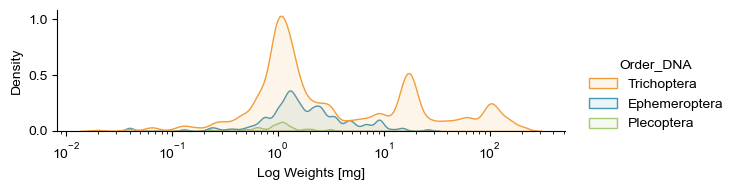

In [55]:
outer_colors = ['#F19E38', '#4397B0', '#A4CB73']

fig = sns.displot(species_info, x='Specimen Weight', kind='kde', hue='Order_DNA', palette=outer_colors, fill=True, alpha=0.1, height=2, aspect=12/4, log_scale=True, bw_adjust=0.25)
fig.set_xlabels('Log Weights [mg]')

plt.savefig('outputs/figures/Weights_distribution.svg')

In [20]:
predictions_list = [predictions_species_plus, predictions_genus_plus, predictions_family_plus, predictions_order_plus, predictions_raw_plus, predictions_raw1_plus]
predictions_list_unf = [predictions_species_unf_plus, predictions_genus_unf_plus, predictions_family_unf_plus, predictions_order_unf_plus, predictions_raw_plus, predictions_raw1_plus]

predictions_list1 = [predictions_species_plus1, predictions_genus_plus1, predictions_family_plus1, predictions_order_plus1, predictions_raw_plus, predictions_raw1_plus]
predictions_list_unf1 = [predictions_species_unf_plus1, predictions_genus_unf_plus1, predictions_family_unf_plus1, predictions_order_unf_plus1, predictions_raw_plus, predictions_raw1_plus]
names  = ['predictions species', 'predictions genus', 'predictions family', 'predictions order', 'predictions raw', 'predictions raw+1']

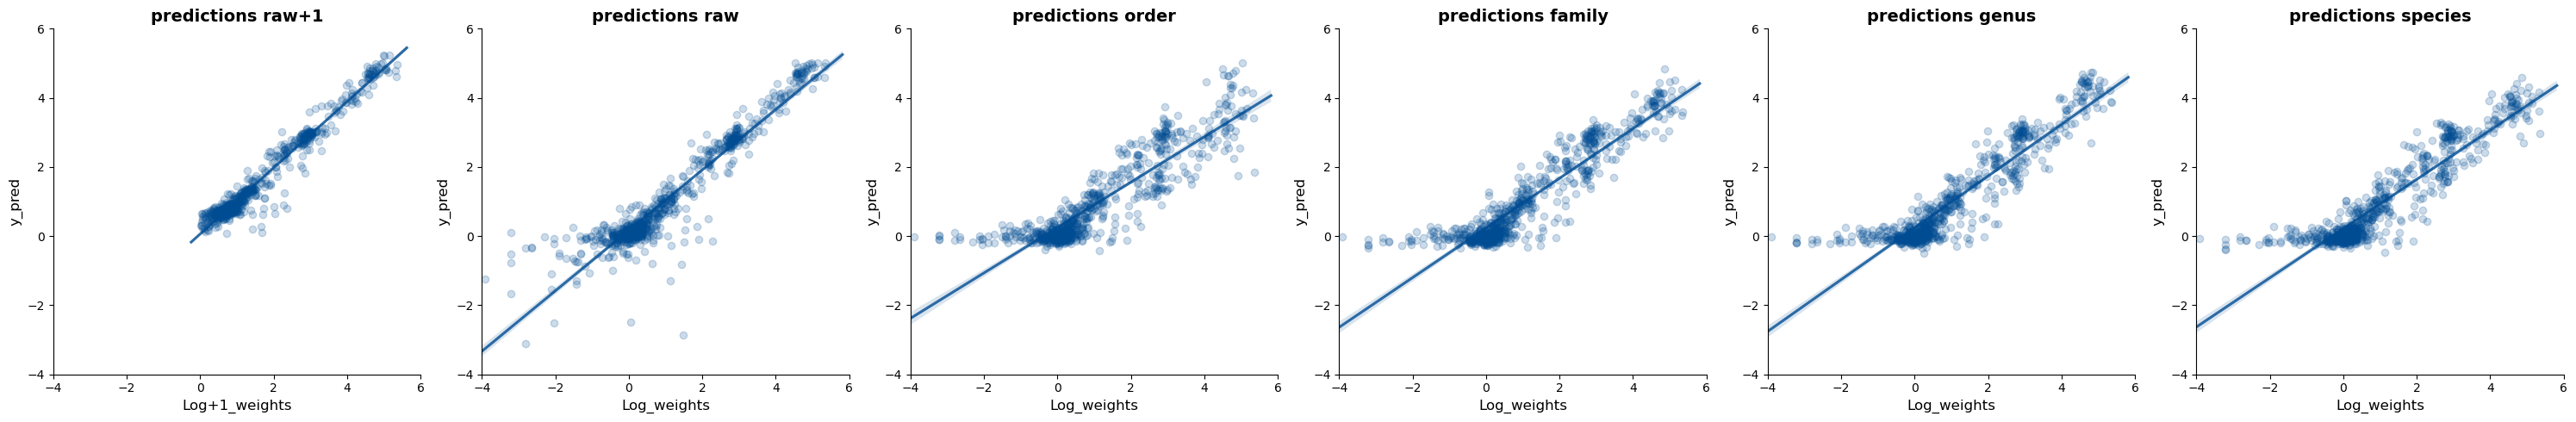

In [21]:
# Set up the figure with 5 subplots
fig, axes = plt.subplots(1, 6, figsize=(30, 5))

custom_color = '#004C93'

# Loop over datasets and corresponding axes
for i, prediction in enumerate(reversed(predictions_list)):
    if i == 0:
        my_x = 'Log+1_weights'
    else: 
        my_x = 'Log_weights'
    sns.regplot(x=my_x, y='y_pred', data=prediction, 
                ax=axes[i], 
                truncate=False, 
                color=custom_color, 
                line_kws={"color": custom_color, "alpha": 0.8},
                scatter_kws={"color": custom_color, "alpha": 0.2})
    axes[i].set_title(names[::-1][i], fontsize=14, weight='bold')
    axes[i].set_xlabel(my_x, fontsize=12)
    axes[i].set_ylabel('y_pred', fontsize=12)
    axes[i].set_xlim(-4, 6)
    axes[i].set_ylim(-4, 6)
    

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('outputs/figures/Predictions-biomass_new.svg')
plt.savefig('outputs/figures/Predictions-biomass_new.png')
plt.show()


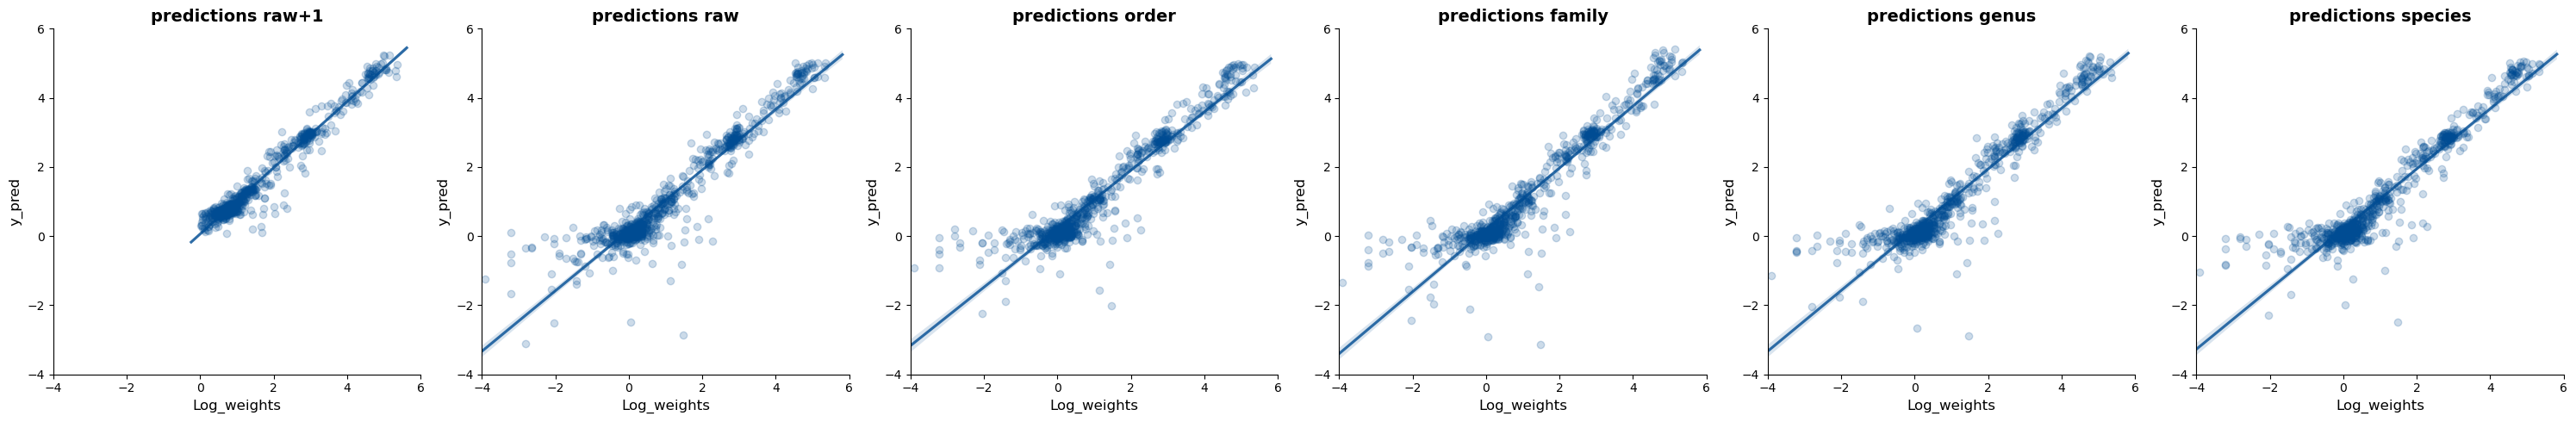

In [22]:
# Set up the figure with 5 subplots
fig, axes = plt.subplots(1, 6, figsize=(30, 5))

custom_color = '#004C93'

# Loop over datasets and corresponding axes
for i, prediction in enumerate(reversed(predictions_list_unf)):
    if i == 0:
        my_x = 'Log+1_weights'
    else: 
        my_x = 'Log_weights'
    sns.regplot(x=my_x, y='y_pred', data=prediction, 
                ax=axes[i], 
                truncate=False, 
                color=custom_color, 
                line_kws={"color": custom_color, "alpha": 0.8},
                scatter_kws={"color": custom_color, "alpha": 0.2})
    axes[i].set_title(names[::-1][i], fontsize=14, weight='bold')
    axes[i].set_xlabel('Log_weights', fontsize=12)
    axes[i].set_ylabel('y_pred', fontsize=12)
    axes[i].set_xlim(-4, 6)
    axes[i].set_ylim(-4, 6)
    

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('outputs/figures/Predictions-biomass-unfrozen_new.svg')
plt.savefig('outputs/figures/Predictions-biomass-unfrozen_new.png')
plt.show()

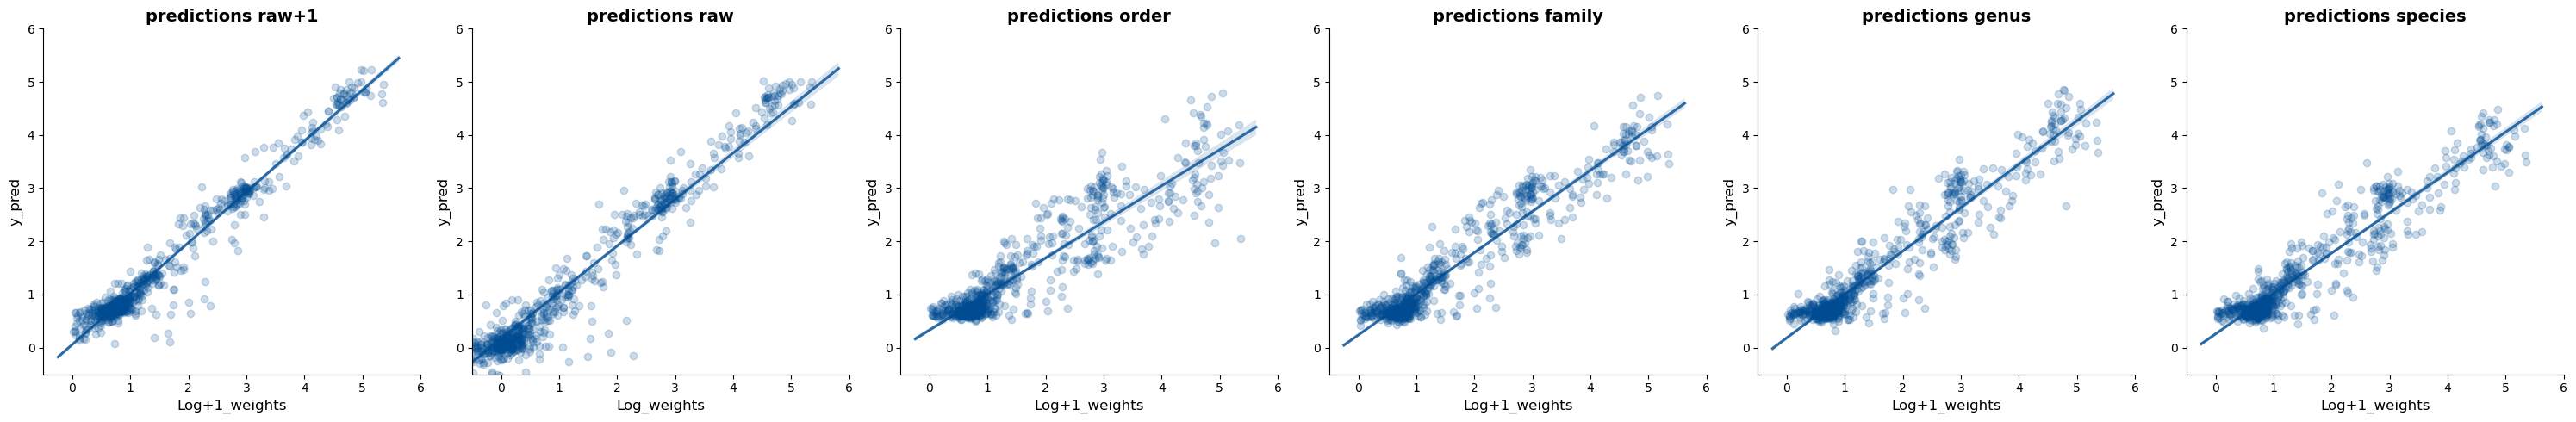

In [23]:
# Set up the figure with 5 subplots
fig, axes = plt.subplots(1, 6, figsize=(30, 5))

custom_color = '#004C93'

# Loop over datasets and corresponding axes
for i, prediction in enumerate(reversed(predictions_list1)):
    if i == 1:
        my_x = 'Log_weights'
    else: 
        my_x = 'Log+1_weights'
    sns.regplot(x=my_x, y='y_pred', data=prediction, 
                ax=axes[i], 
                truncate=False, 
                color=custom_color, 
                line_kws={"color": custom_color, "alpha": 0.8},
                scatter_kws={"color": custom_color, "alpha": 0.2})
    axes[i].set_title(names[::-1][i], fontsize=14, weight='bold')
    axes[i].set_xlabel(my_x, fontsize=12)
    axes[i].set_ylabel('y_pred', fontsize=12)
    axes[i].set_xlim(-0.5, 6)
    axes[i].set_ylim(-0.5, 6)
    

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('outputs/figures/Predictions-biomass1_new.svg')
plt.savefig('outputs/figures/vPredictions-biomass1_new.png')
plt.show()

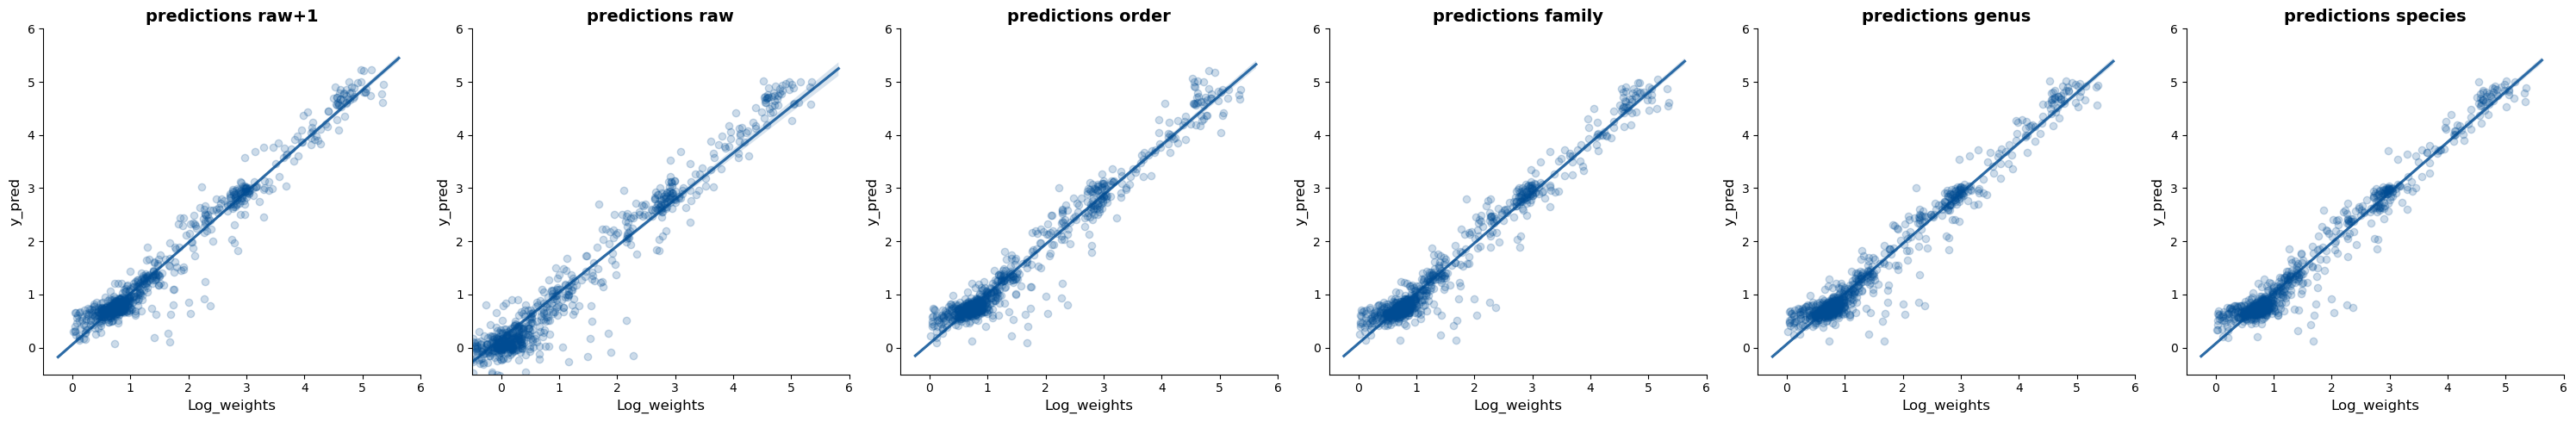

In [24]:
# Set up the figure with 5 subplots
fig, axes = plt.subplots(1, 6, figsize=(30, 5))

custom_color = '#004C93'

# Loop over datasets and corresponding axes
for i, prediction in enumerate(reversed(predictions_list_unf1)):
    if i == 1:
        my_x = 'Log_weights'
    else: 
        my_x = 'Log+1_weights'
    sns.regplot(x=my_x, y='y_pred', data=prediction, 
                ax=axes[i], 
                truncate=False, 
                color=custom_color, 
                line_kws={"color": custom_color, "alpha": 0.8},
                scatter_kws={"color": custom_color, "alpha": 0.2})
    axes[i].set_title(names[::-1][i], fontsize=14, weight='bold')
    axes[i].set_xlabel('Log_weights', fontsize=12)
    axes[i].set_ylabel('y_pred', fontsize=12)
    axes[i].set_xlim(-0.5, 6)
    axes[i].set_ylim(-0.5, 6)
    

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('outputs/figures/Predictions-biomass-unfrozen1_new.svg')
plt.savefig('outputs/figures/Predictions-biomass-unfrozen1_new.png')
plt.show()

<Figure size 640x480 with 0 Axes>

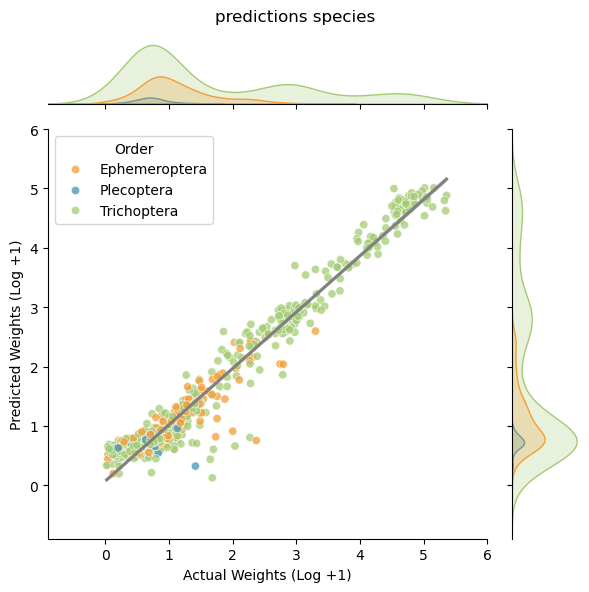

<Figure size 640x480 with 0 Axes>

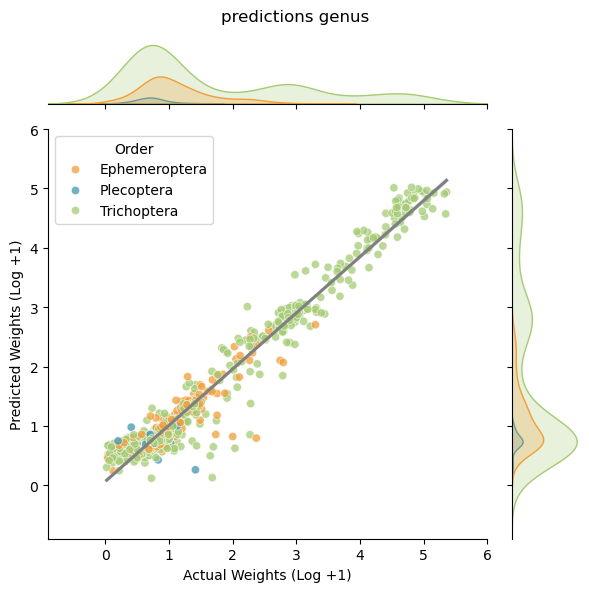

<Figure size 640x480 with 0 Axes>

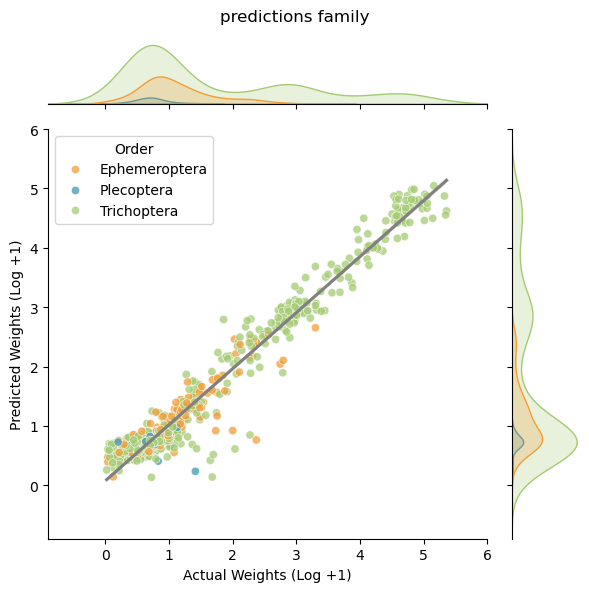

<Figure size 640x480 with 0 Axes>

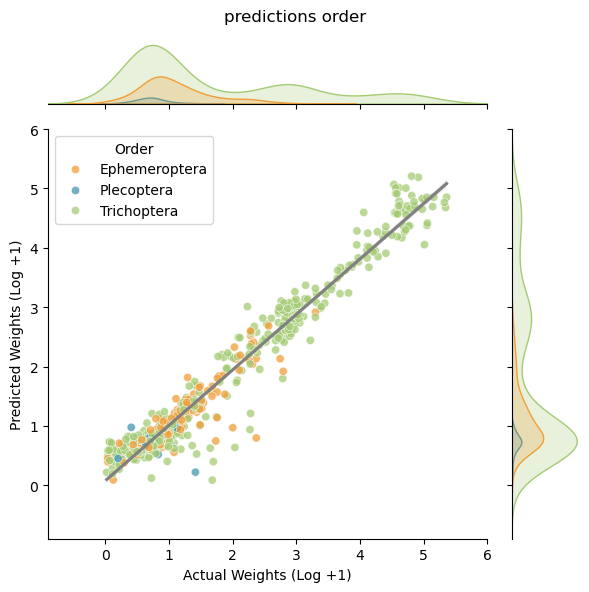

<Figure size 640x480 with 0 Axes>

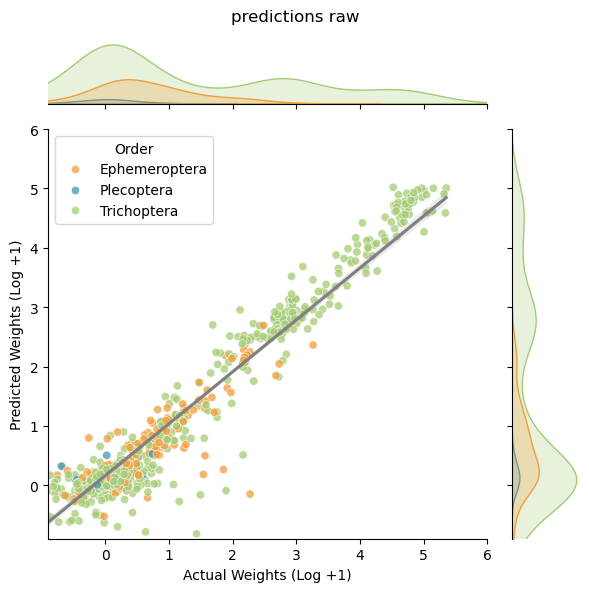

<Figure size 640x480 with 0 Axes>

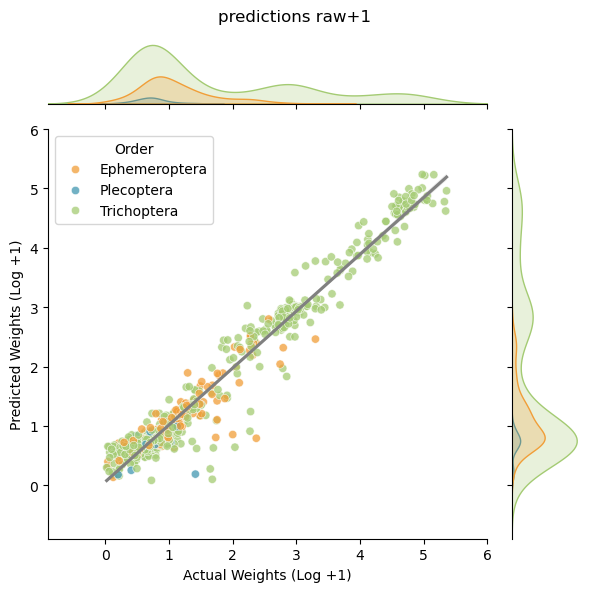

In [25]:
for i, prediction in enumerate(predictions_list_unf1):
    if i == 4:
        my_x = 'Log_weights'
    else: 
        my_x = 'Log+1_weights'

    plt.figure() 
    g = sns.jointplot(data=prediction, x=my_x, y='y_pred', 
                     hue='Order_DNA', palette=outer_colors, hue_order=['Ephemeroptera', 'Plecoptera', 'Trichoptera'], 
                     alpha=0.75, ylim=(-0.9,6), xlim=(-0.9,6))
    g1 = sns.regplot(x=my_x, y='y_pred', data=prediction, scatter=False, 
                    ax=g.ax_joint, line_kws={'color': 'grey', 'alpha': 1} )

    g.set_axis_labels(xlabel='Actual Weights (Log +1)', ylabel='Predicted Weights (Log +1)')
    g.fig.suptitle(names[i])
    plt.legend(title='Order')
    plt.tight_layout()
    plt.savefig(f'outputs/figures/{names[i]}_jointplot.png')
    plt.savefig(f'outputs/figures/{names[i]}_jointplot.svg')
    plt.show()
    plt.close()


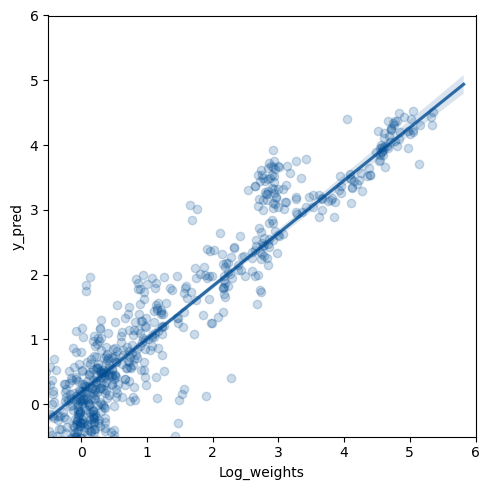

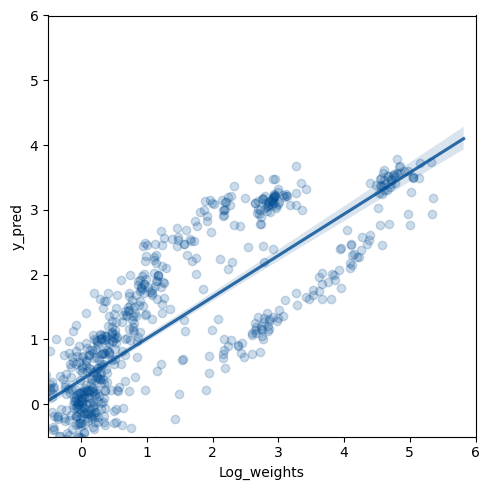

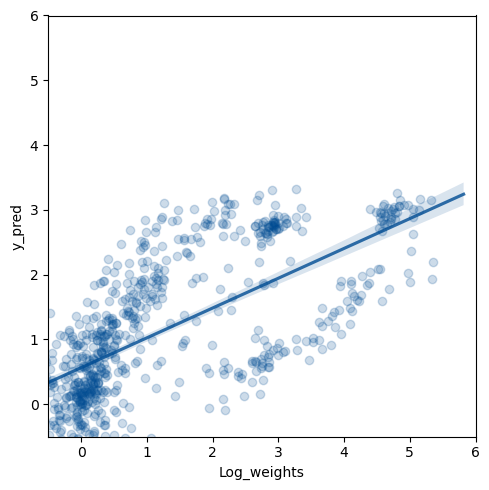

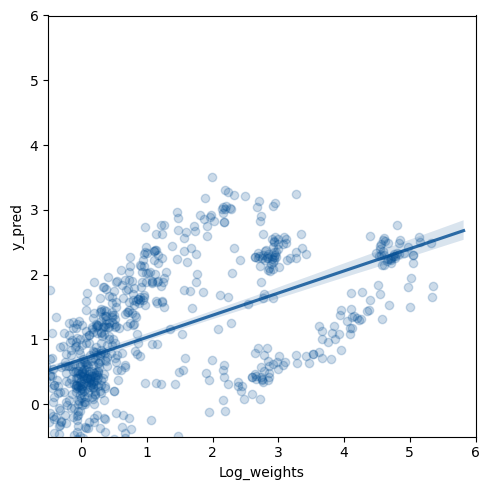

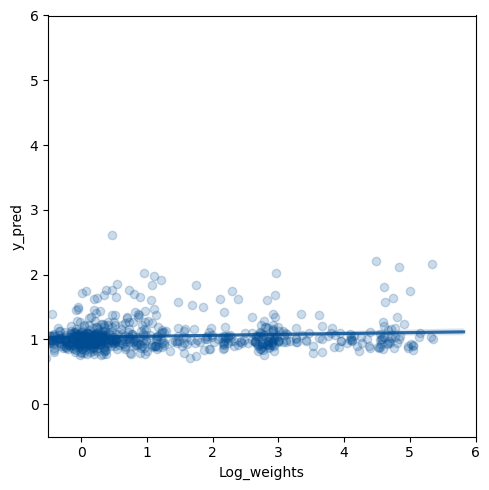

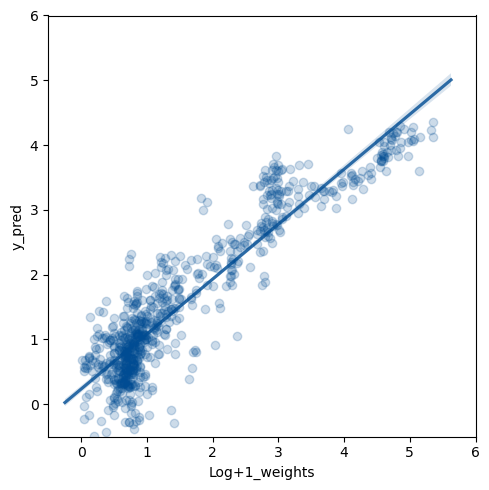

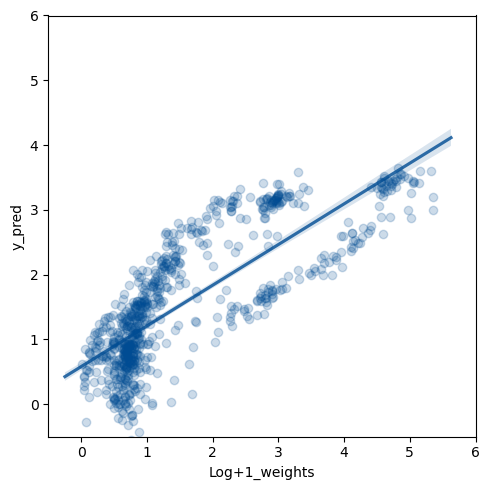

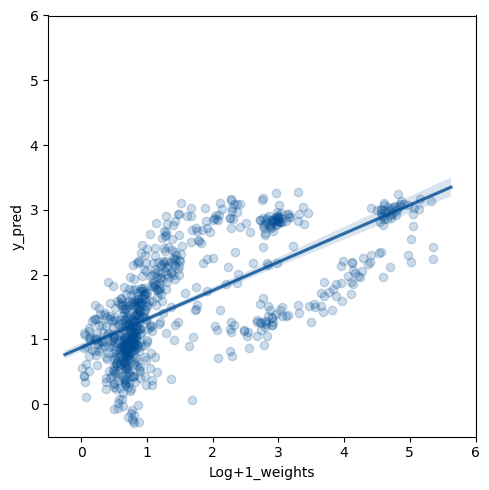

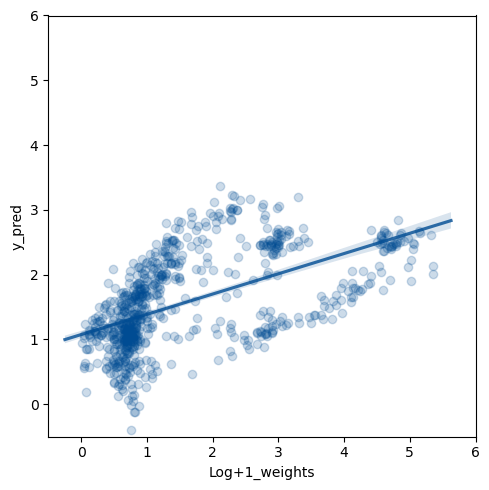

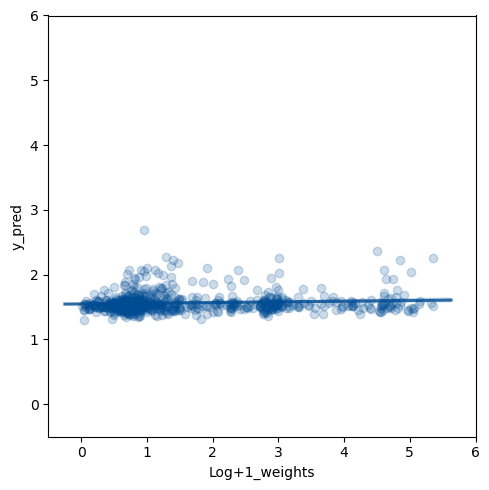

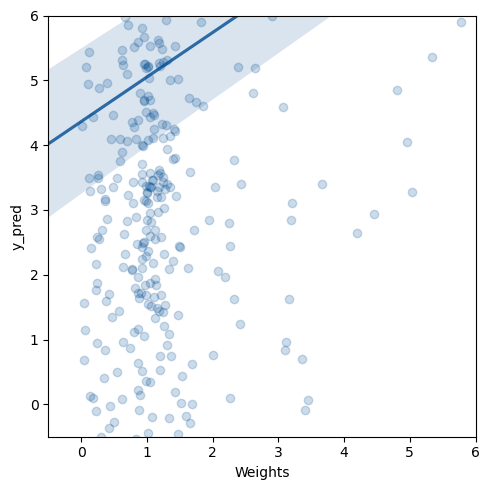

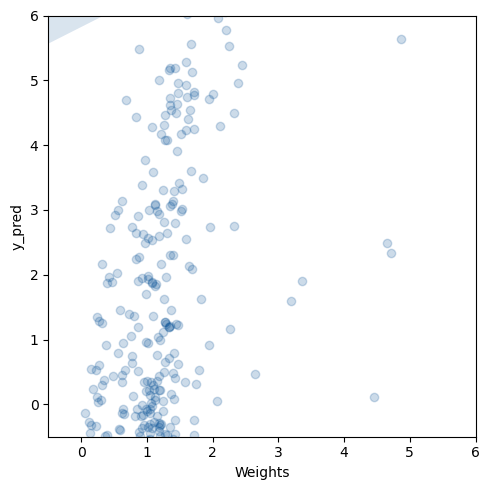

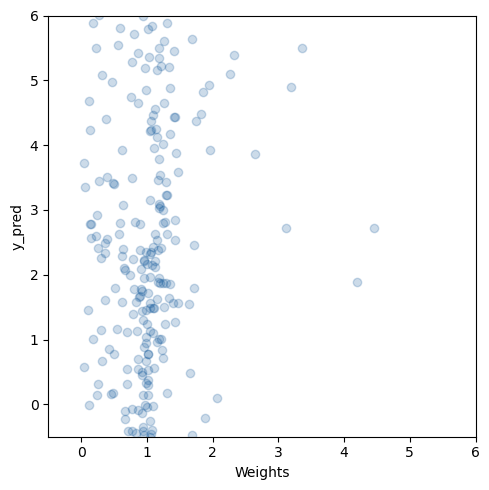

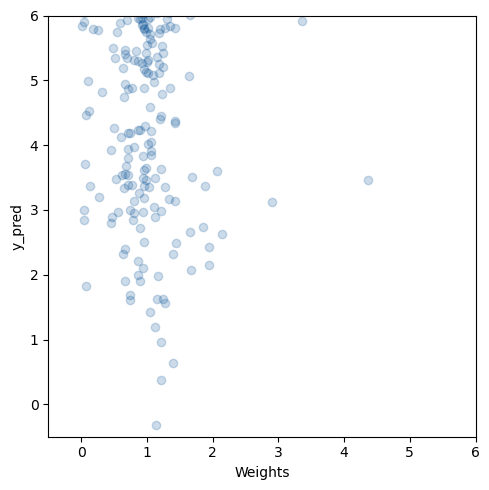

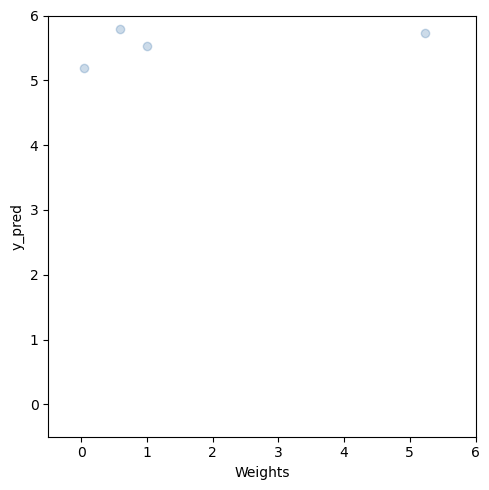

In [26]:
for i, (name, prediction) in enumerate(predictions_linear_dict.items()):

    if 'Log' in name:
        if '1Log' in name:
            my_x = 'Log+1_weights'
            my_x_label = 'Actual Weights (Log +1)'
            my_y_label = 'Predicted Weights (Log +1)'
        else:
            my_x = 'Log_weights'
            my_x_label = 'Actual Weights (Log)'
            my_y_label = 'Predicted Weights (Log)'
    else:
        my_x = 'Weights'
        my_x_label = 'Actual Weights'
        my_y_label = 'Predicted Weights'

    plt.figure(figsize=(5, 5)) 
    g = sns.regplot(x=my_x, y='y_pred', data=prediction,  
                truncate=False, 
                color=custom_color, 
                line_kws={"color": custom_color, "alpha": 0.8},
                scatter_kws={"color": custom_color, "alpha": 0.2})
    g.set_xlim(-0.5, 6)
    g.set_ylim(-0.5, 6)
    plt.tight_layout()
    if '1LogArea+LogMaxFeret+LogPerimeter' in name:
        plt.savefig(f'outputs/figures/1LogArea+LogMaxFeret+LogPerimeter_jointplot_blue.png')
        plt.savefig(f'outputs/figures/1LogArea+LogMaxFeret+LogPerimeter_jointplot_blue.svg')
    plt.show()
    plt.close()

<Figure size 640x480 with 0 Axes>

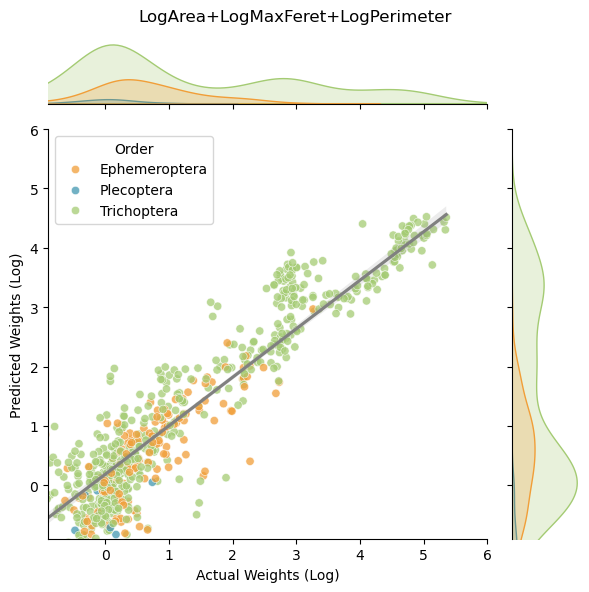

<Figure size 640x480 with 0 Axes>

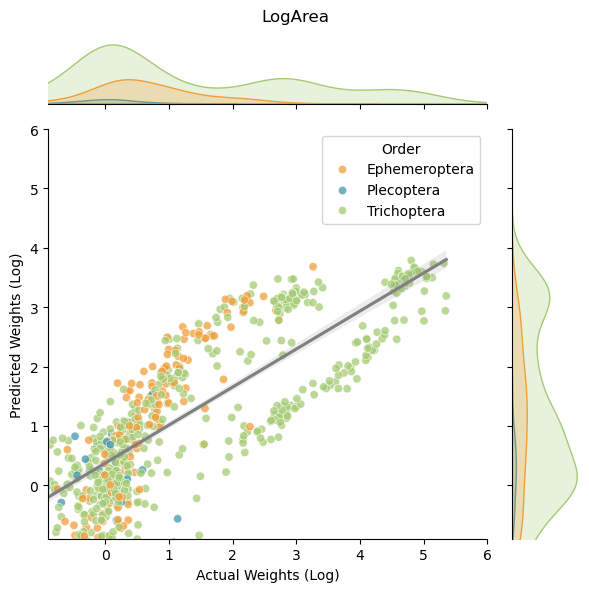

<Figure size 640x480 with 0 Axes>

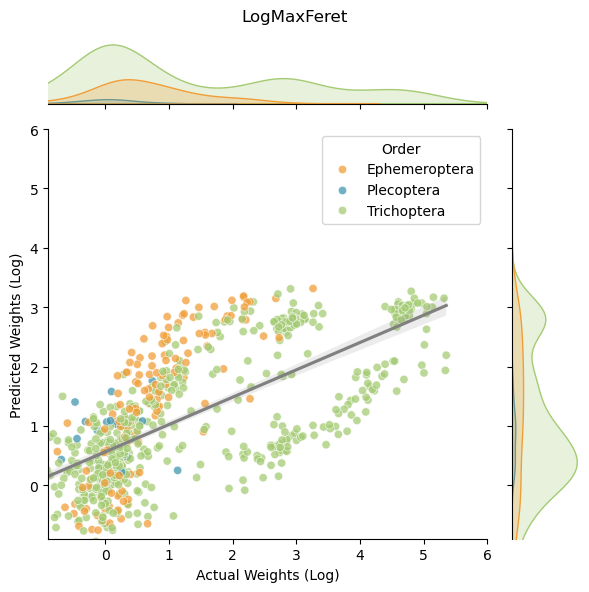

<Figure size 640x480 with 0 Axes>

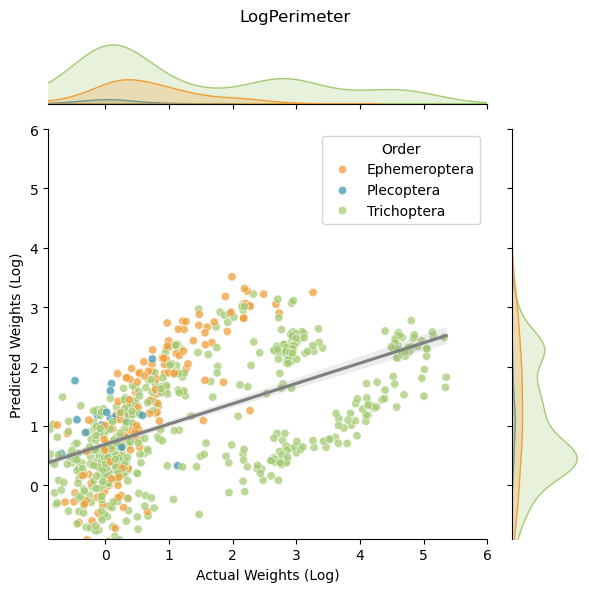

<Figure size 640x480 with 0 Axes>

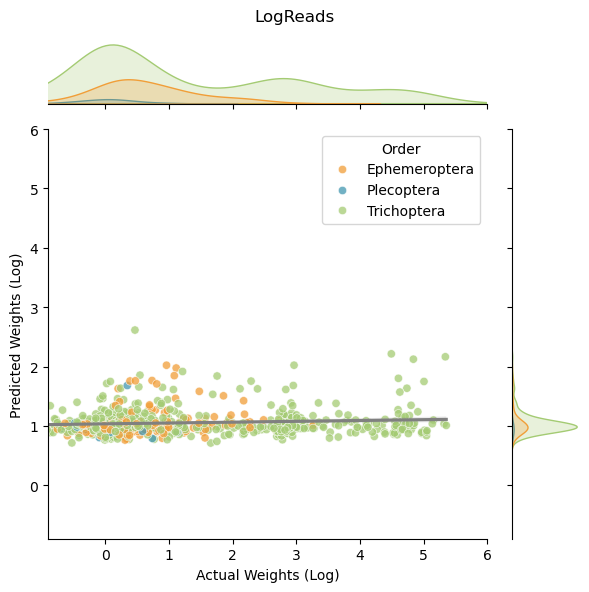

<Figure size 640x480 with 0 Axes>

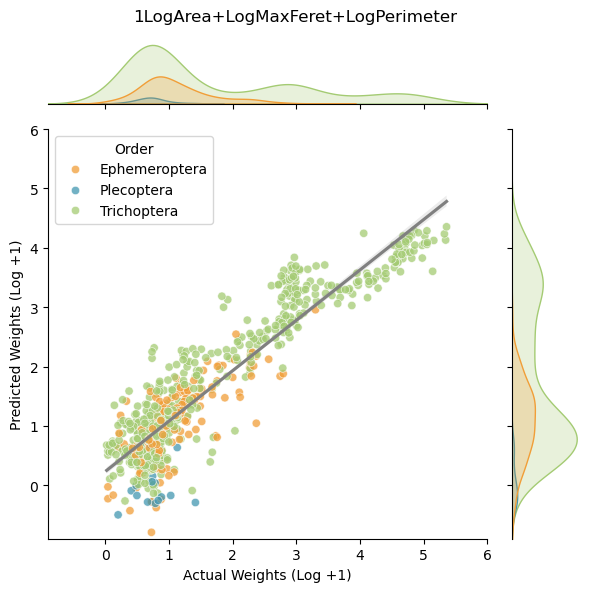

<Figure size 640x480 with 0 Axes>

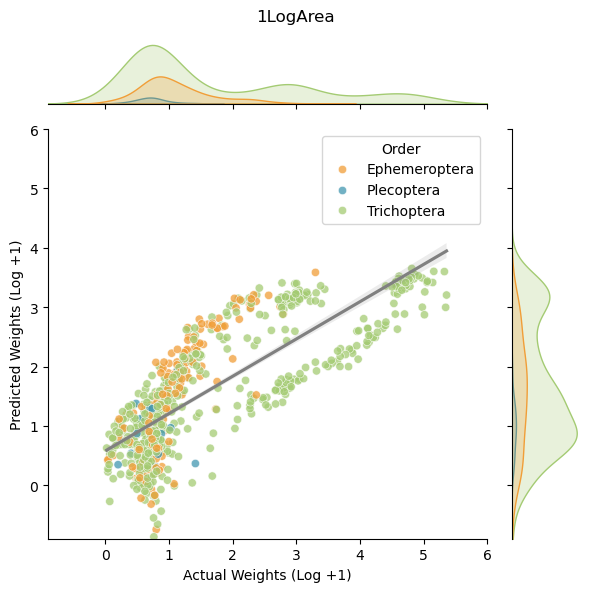

<Figure size 640x480 with 0 Axes>

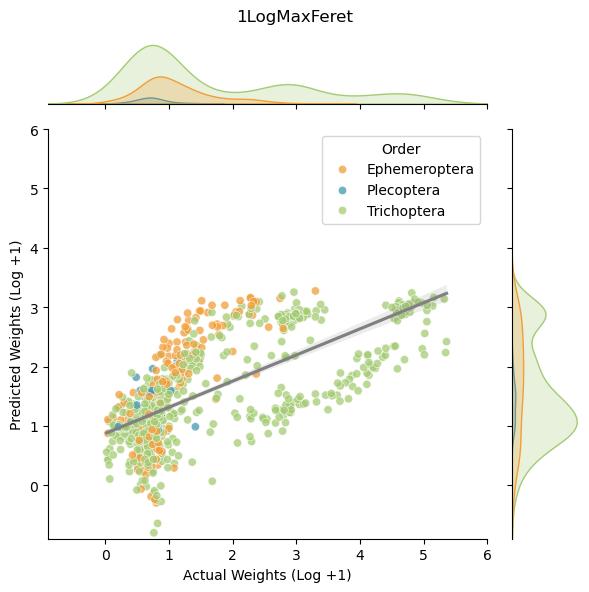

<Figure size 640x480 with 0 Axes>

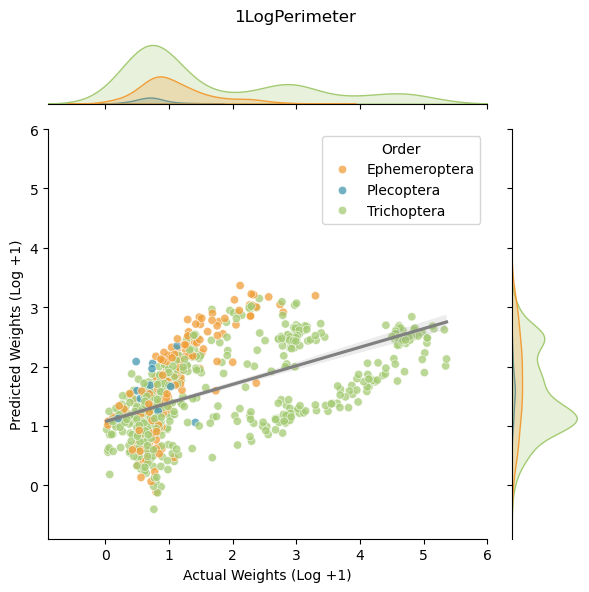

<Figure size 640x480 with 0 Axes>

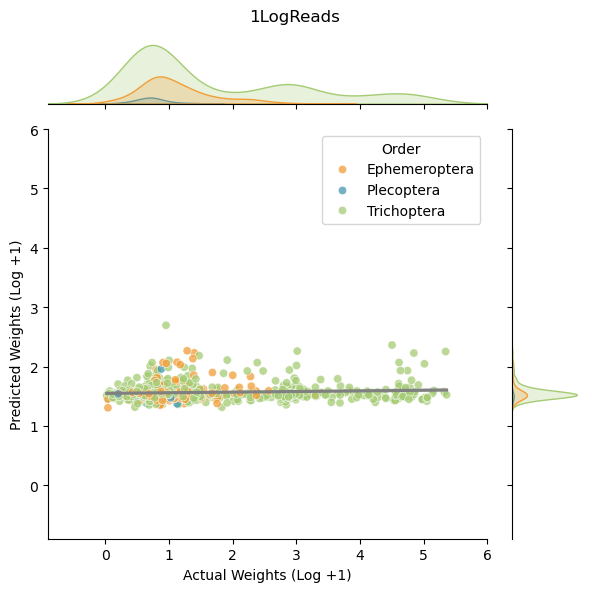

<Figure size 640x480 with 0 Axes>

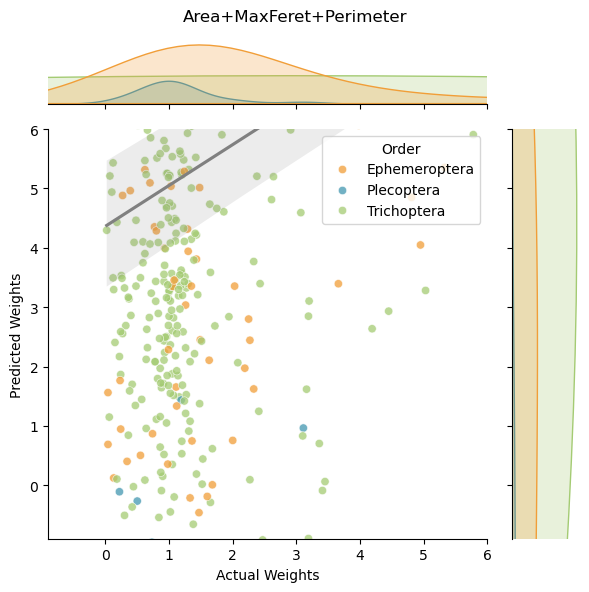

<Figure size 640x480 with 0 Axes>

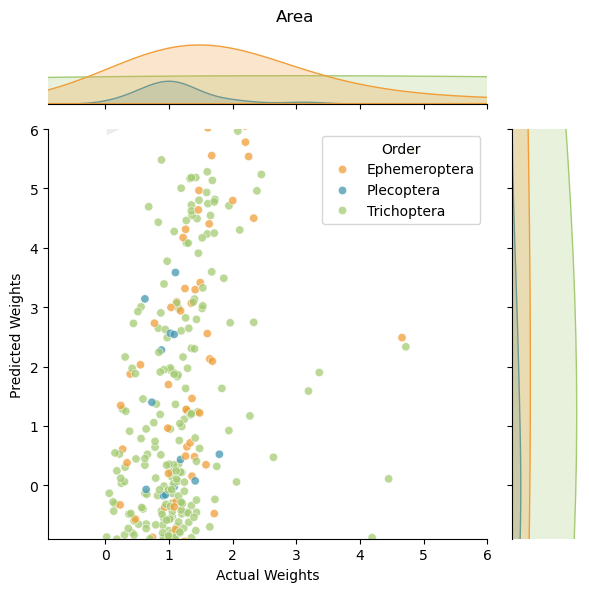

<Figure size 640x480 with 0 Axes>

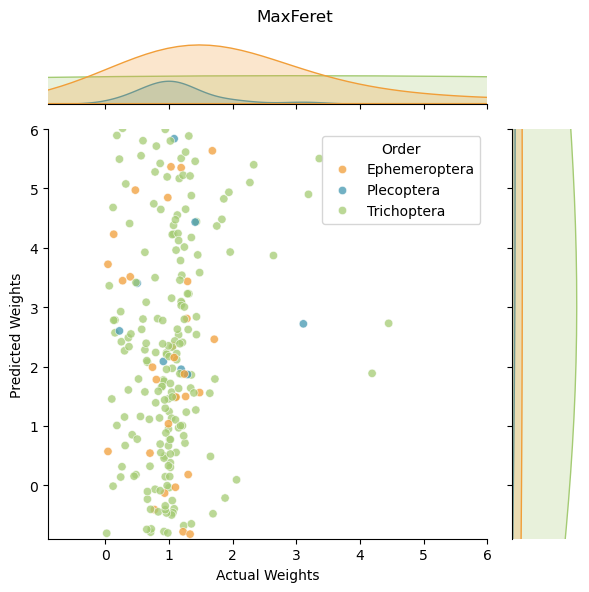

<Figure size 640x480 with 0 Axes>

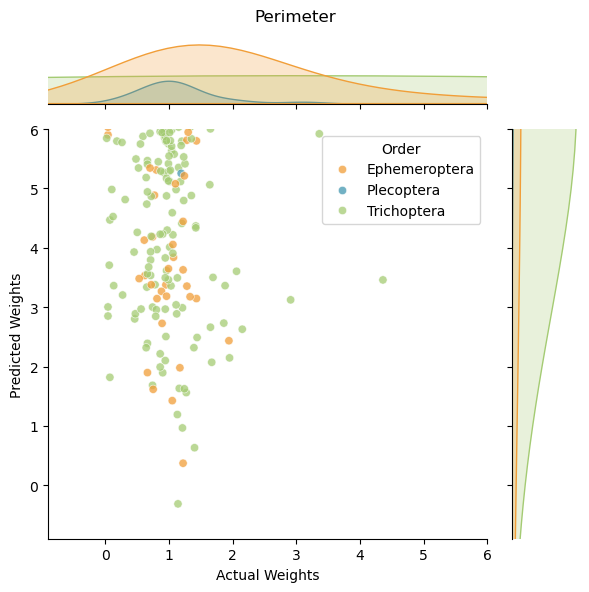

<Figure size 640x480 with 0 Axes>

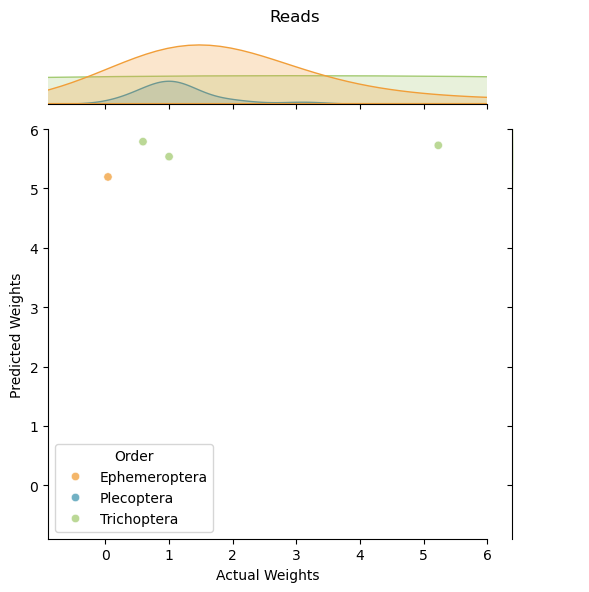

In [27]:
for i, (name, prediction) in enumerate(predictions_linear_dict.items()):

    if 'Log' in name:
        if '1Log' in name:
            my_x = 'Log+1_weights'
            my_x_label = 'Actual Weights (Log +1)'
            my_y_label = 'Predicted Weights (Log +1)'
        else:
            my_x = 'Log_weights'
            my_x_label = 'Actual Weights (Log)'
            my_y_label = 'Predicted Weights (Log)'
    else:
        my_x = 'Weights'
        my_x_label = 'Actual Weights'
        my_y_label = 'Predicted Weights'

    plt.figure() 
    g = sns.jointplot(data=prediction, x=my_x, y='y_pred', 
                     hue='Order_DNA', palette=outer_colors, hue_order=['Ephemeroptera', 'Plecoptera', 'Trichoptera'], 
                     alpha=0.75, ylim=(-0.9,6), xlim=(-0.9,6)
)
    g1 = sns.regplot(data=prediction, x=my_x, y='y_pred', scatter=False, 
                    ax=g.ax_joint, line_kws={'color': 'grey', 'alpha': 1})

    g.set_axis_labels(xlabel=my_x_label, ylabel=my_y_label)
    g.fig.suptitle(name)
    plt.legend(title='Order')
    plt.tight_layout()
    if '1LogArea+LogMaxFeret+LogPerimeter' in name:
        plt.savefig(f'outputs/figures/1LogArea+LogMaxFeret+LogPerimeter_jointplot.png')
        plt.savefig(f'outputs/figures/1LogArea+LogMaxFeret+LogPerimeter_jointplot.svg')
    if '1LogReads' in name:
        plt.savefig(f'outputs/figures/1LogReads_jointplot.png')
        plt.savefig(f'outputs/figures/1LogReads_jointplot.svg')
    plt.show()
    plt.close()

In [28]:
# Functions to calculate metrics (MAPE, MdAPE, MAE, MdAE, R-squared (and bootstrap MAE))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def median_absolute_error(y_true, y_pred):
    return np.median(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  # Sum of squares of residuals
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)

def bootstrap_ci(y_true, y_pred, num_bootstrap=1000, alpha=0.05):
    mae_list = []
    n = len(y_true)
    for _ in range(num_bootstrap):
        indices = np.random.choice(range(n), size=n, replace=True)
        y_true_sample = y_true.iloc[indices]
        y_pred_sample = y_pred.iloc[indices]
        mae_list.append(mean_absolute_error(y_true_sample, y_pred_sample))
    
    lower = np.percentile(mae_list, 100 * (alpha / 2)).round(3)
    upper = np.percentile(mae_list, 100 * (1 - alpha / 2)).round(3)
    return lower, upper

In [29]:
def create_metrics_dict(list_of_names, list_of_predictions):
    metrics_dict = {'CNN': [],
                'MdAPE': [],
                'MAPE': [],
                'MdAE': [],
                'MAE': [],
                'MAE conf': [],
                'R-squared': [],
                'Count': []
                }
    for i, prediction in enumerate(list_of_predictions):
        metrics_dict['CNN'].append(list_of_names[i])
        metrics_dict['MdAPE'].append(median_absolute_percentage_error(prediction['Weights'], prediction['Weights_pred']).round(3))
        metrics_dict['MAPE'].append(mean_absolute_percentage_error(prediction['Weights'], prediction['Weights_pred']).round(3))
        metrics_dict['MdAE'].append(median_absolute_error(prediction['Weights'], prediction['Weights_pred']).round(3))
        metrics_dict['MAE'].append(mean_absolute_error(prediction['Weights'], prediction['Weights_pred']).round(3))
        metrics_dict['MAE conf'].append(bootstrap_ci(prediction['Weights'],prediction['Weights_pred']))
        metrics_dict['R-squared'].append(r_squared(prediction['Weights'], prediction['Weights_pred']).round(3))
        metrics_dict['Count'].append(len(prediction))

    return metrics_dict

In [30]:
print('Results linear models:')
pd.DataFrame(create_metrics_dict(list(predictions_linear_dict.keys()), predictions_linear_dict.values()))

Results linear models:


CNN  MdAPE    MAPE    MdAE     MAE  \
0    LogArea+LogMaxFeret+LogPerimeter  0.390   0.795   0.716   6.729   
1                             LogArea  0.696   1.055   1.244  10.300   
2                         LogMaxFeret  0.795   1.356   1.524  11.493   
3                        LogPerimeter  0.888   1.534   1.841  12.460   
4                            LogReads  0.975   2.461   1.996  13.197   
5   1LogArea+LogMaxFeret+LogPerimeter  0.487   0.967   0.964   7.270   
6                            1LogArea  0.799   1.291   1.834  10.637   
7                        1LogMaxFeret  0.868   1.710   2.075  11.728   
8                       1LogPerimeter  0.927   1.990   2.704  12.620   
9                           1LogReads  1.377   3.352   2.856  13.480   
10            Area+MaxFeret+Perimeter  2.153   4.748   4.969  10.040   
11                               Area  1.800   2.730   3.495  12.493   
12                           MaxFeret  2.409   4.587   7.385  15.545   
13                          Perimeter  4.539   6.978   8.028  16.557   
14                              Reads  7.357  13.289  12.264  18.141   

            MAE conf  R-squared  Count  
0     (5.632, 8.004)      0.680    743  
1    (8.573, 12.061)      0.287    743  
2     (9.531, 13.61)      0.096    743  
3   (10.556, 14.739)     -0.014    743  
4   (11.059, 15.428)     -0.115    743  
5     (6.008, 8.749)      0.606    743  
6    (8.892, 12.442)      0.262    743  
7    (9.668, 13.812)      0.102    743  
8   (10.767, 14.896)      0.005    743  
9   (11.468, 15.765)     -0.097    743  
10   (8.987, 11.136)      0.685    743  
11  (11.218, 13.895)      0.496    743  
12  (13.943, 17.148)      0.267    743  
13  (14.849, 18.351)      0.124    743  
14  (16.324, 20.108)     -0.000    743

In [31]:
print('Results Log transformed weights with frozen base:')
pd.DataFrame(create_metrics_dict(names, predictions_list))

Results Log transformed weights with frozen base:


CNN  MdAPE   MAPE   MdAE    MAE        MAE conf  R-squared  \
0  predictions species  0.268  0.704  0.532  7.418  (5.826, 9.132)      0.503   
1    predictions genus  0.241  0.702  0.505  5.765  (4.577, 7.061)      0.674   
2   predictions family  0.271  0.705  0.497  7.067  (5.686, 8.494)      0.547   
3    predictions order  0.284  0.769  0.531  7.973  (6.427, 9.633)      0.428   
4      predictions raw  0.184  0.460  0.395  2.793  (2.205, 3.447)      0.919   
5    predictions raw+1  0.171  0.444  0.366  2.621   (2.097, 3.23)      0.930   

   Count  
0    743  
1    743  
2    743  
3    743  
4    743  
5    743

In [32]:
print('Results Log+1 transformed weights with frozen base:')
pd.DataFrame(create_metrics_dict(names, predictions_list1))

Results Log+1 transformed weights with frozen base:


CNN  MdAPE   MAPE   MdAE    MAE         MAE conf  \
0  predictions species  0.285  0.735  0.504  7.174   (5.719, 8.633)   
1    predictions genus  0.251  0.688  0.489  5.989   (4.791, 7.337)   
2   predictions family  0.278  0.712  0.517  7.039   (5.575, 8.575)   
3    predictions order  0.292  0.788  0.558  8.327  (6.697, 10.108)   
4      predictions raw  0.184  0.460  0.395  2.793   (2.234, 3.464)   
5    predictions raw+1  0.171  0.444  0.366  2.621   (2.075, 3.241)   

   R-squared  Count  
0      0.520    743  
1      0.654    743  
2      0.547    743  
3      0.395    743  
4      0.919    743  
5      0.930    743

In [33]:
print('Results Log transformed weights with unfrozen base:')
pd.DataFrame(create_metrics_dict(names, predictions_list_unf))

Results Log transformed weights with unfrozen base:


CNN  MdAPE   MAPE   MdAE    MAE        MAE conf  R-squared  \
0  predictions species  0.185  0.519  0.392  2.788  (2.237, 3.366)      0.924   
1    predictions genus  0.184  0.510  0.385  3.067  (2.423, 3.741)      0.903   
2   predictions family  0.191  0.499  0.414  3.521   (2.787, 4.32)      0.867   
3    predictions order  0.188  0.533  0.402  3.442  (2.686, 4.225)      0.873   
4      predictions raw  0.184  0.460  0.395  2.793  (2.213, 3.404)      0.919   
5    predictions raw+1  0.171  0.444  0.366  2.621   (2.112, 3.19)      0.930   

   Count  
0    743  
1    743  
2    743  
3    743  
4    743  
5    743

In [34]:
print('Results Log+1 transformed weights with unfrozen base:')
pd.DataFrame(create_metrics_dict(names, predictions_list_unf1))

Results Log+1 transformed weights with unfrozen base:


CNN  MdAPE   MAPE   MdAE    MAE        MAE conf  R-squared  \
0  predictions species  0.175  0.508  0.393  2.492  (1.962, 3.075)      0.929   
1    predictions genus  0.173  0.506  0.377  2.624  (2.075, 3.265)      0.925   
2   predictions family  0.179  0.487  0.406  2.866  (2.226, 3.613)      0.905   
3    predictions order  0.191  0.488  0.407  3.501  (2.759, 4.361)      0.870   
4      predictions raw  0.184  0.460  0.395  2.793  (2.241, 3.397)      0.919   
5    predictions raw+1  0.171  0.444  0.366  2.621  (2.035, 3.263)      0.930   

   Count  
0    743  
1    743  
2    743  
3    743  
4    743  
5    743

In [35]:
pd.DataFrame(create_metrics_dict(['Ephemeroptera', 'Plecoptera', 'Trichoptera'], 
                                 [predictions_raw1_plus.loc[predictions_raw1_plus['Order_DNA']=='Ephemeroptera'],
                                  predictions_raw1_plus.loc[predictions_raw1_plus['Order_DNA']=='Plecoptera'],
                                  predictions_raw1_plus.loc[predictions_raw1_plus['Order_DNA']=='Trichoptera']
                                             ]))

CNN  MdAPE   MAPE   MdAE    MAE        MAE conf  R-squared  Count
0  Ephemeroptera  0.173  0.399  0.290  0.753  (0.522, 1.038)      0.674    155
1     Plecoptera  0.190  0.319  0.200  0.403  (0.197, 0.726)     -0.397     19
2    Trichoptera  0.170  0.460  0.414  3.204  (2.516, 3.945)      0.927    569

In [36]:
pd.DataFrame(create_metrics_dict(['Ephemeroptera', 'Plecoptera', 'Trichoptera'], 
                                 [predictions_raw1_plus.loc[(predictions_raw1_plus['Order_DNA']=='Ephemeroptera') & (predictions_raw1_plus['Weights'] > 1)],
                                  predictions_raw1_plus.loc[(predictions_raw1_plus['Order_DNA']=='Plecoptera') & (predictions_raw1_plus['Weights'] > 1)],
                                  predictions_raw1_plus.loc[(predictions_raw1_plus['Order_DNA']=='Trichoptera') & (predictions_raw1_plus['Weights'] > 1)]
                                             ]))

CNN  MdAPE   MAPE   MdAE    MAE        MAE conf  R-squared  Count
0  Ephemeroptera  0.161  0.208  0.318  0.877  (0.572, 1.284)      0.637    123
1     Plecoptera  0.166  0.261  0.197  0.505  (0.184, 1.005)     -1.370     11
2    Trichoptera  0.146  0.200  0.705  4.247  (3.345, 5.187)      0.921    419

In [37]:
pd.DataFrame(create_metrics_dict(['Ephemeroptera', 'Plecoptera', 'Trichoptera'], 
                                 [predictions_raw1_plus.loc[(predictions_raw1_plus['Order_DNA']=='Ephemeroptera') & (predictions_raw1_plus['Weights'] <= 1)],
                                  predictions_raw1_plus.loc[(predictions_raw1_plus['Order_DNA']=='Plecoptera') & (predictions_raw1_plus['Weights'] <= 1)],
                                  predictions_raw1_plus.loc[(predictions_raw1_plus['Order_DNA']=='Trichoptera') & (predictions_raw1_plus['Weights'] <= 1)]
                                             ]))

CNN  MdAPE   MAPE   MdAE    MAE        MAE conf  R-squared  Count
0  Ephemeroptera  0.296  1.130  0.212  0.278  (0.205, 0.358)     -0.578     32
1     Plecoptera  0.271  0.399  0.206  0.262  (0.139, 0.415)     -1.095      8
2    Trichoptera  0.322  1.186  0.249  0.290  (0.256, 0.326)     -0.601    150

In [38]:
species_names = ['Amphinemura standfussi', 'Anabolia nervosa', 'Athripsodes cinereus', 'Baetis rhodani', 'Baetis vernus', 'Caenis horaria', 'Chaetopteryx villosa', 'Ephemera danica', 'Goera pilosa', 'Halesus radiatus', 'Limnephilus lunatus', 'Mystacides azureus', 'Nemoura cinerea', 'Potamophylax rotundipennis']

species_metrics_df = pd.DataFrame(create_metrics_dict(species_names, [predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Amphinemura standfussi'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Anabolia nervosa'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Athripsodes cinereus'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Baetis rhodani'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Baetis vernus'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Caenis horaria'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Chaetopteryx villosa'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Ephemera danica'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Goera pilosa'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Halesus radiatus'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Limnephilus lunatus'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Mystacides azureus'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Nemoura cinerea'],
                             predictions_raw1_plus.loc[predictions_raw1_plus['Species_DNA']=='Potamophylax rotundipennis']]))

species_metrics_df

CNN  MdAPE   MAPE   MdAE    MAE         MAE conf  \
0       Amphinemura standfussi  0.218  0.336  0.198  0.240   (0.135, 0.374)   
1             Anabolia nervosa  0.239  0.295  0.536  0.838   (0.492, 1.209)   
2         Athripsodes cinereus  0.202  1.196  0.255  0.475    (0.251, 0.79)   
3               Baetis rhodani  0.205  0.698  0.258  0.415   (0.265, 0.628)   
4                Baetis vernus  0.192  0.657  0.315  0.345   (0.179, 0.521)   
5               Caenis horaria  0.161  0.207  0.172  0.211   (0.135, 0.325)   
6         Chaetopteryx villosa  0.182  0.300  0.273  1.132   (0.484, 1.967)   
7              Ephemera danica  0.162  0.240  0.383  1.150    (0.711, 1.69)   
8                 Goera pilosa  0.158  0.263  2.016  7.474   (5.19, 10.175)   
9             Halesus radiatus  0.228  0.341  1.916  2.878   (1.697, 4.513)   
10         Limnephilus lunatus  0.192  0.642  0.208  0.405   (0.306, 0.529)   
11          Mystacides azureus  0.330  0.464  0.282  0.448   (0.235, 0.753)   
12             Nemoura cinerea  0.190  0.301  0.275  0.583    (0.204, 1.18)   
13  Potamophylax rotundipennis  0.106  0.127  2.830  7.642  (5.407, 10.366)   

    R-squared  Count  
0       0.250     10  
1       0.917     18  
2       0.105     33  
3       0.464     47  
4       0.118      9  
5       0.122     21  
6       0.396     45  
7       0.605     78  
8       0.845    119  
9       0.466     20  
10      0.703    231  
11     -0.018     12  
12     -1.168      9  
13      0.920     91

## EPT classification reports

In [39]:
import pickle
with open('outputs/Predictions/EPT_reports_with_reports.pkl', 'rb') as f:
    reports = pickle.load(f)

In [40]:
metrics_df = pd.DataFrame(reports['classification_report']['species']['weighted avg']).add_suffix(' species').join(pd.DataFrame(reports['classification_report']['genus']['weighted avg']).add_suffix(' genus')).join(pd.DataFrame(reports['classification_report']['family']['weighted avg']).add_suffix(' family')).join(pd.DataFrame(reports['classification_report']['order']['weighted avg']).add_suffix(' order')).drop('support')
metrics_df = metrics_df.rename(columns={'weighted avg species': 'Species', 'weighted avg genus': 'Genus', 'weighted avg family': 'Family', 'weighted avg order': 'Order'})
metrics_df.index = [x.title() for x in metrics_df.index]
metrics_df = metrics_df.iloc[:, ::-1]

In [41]:
metrics_df

Order    Family     Genus   Species
Precision  0.989204  0.948433  0.849823  0.859745
Recall     0.989233  0.948856  0.855989  0.860027
F1-Score   0.989207  0.948328  0.847782  0.853151

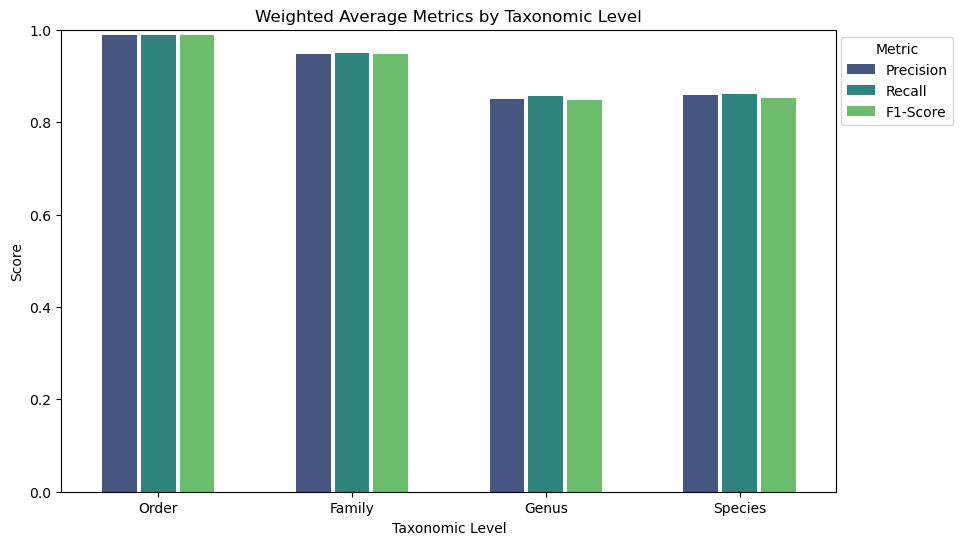

In [42]:
import seaborn as sns

# Convert to long format for Seaborn
df_long = metrics_df.reset_index().melt(id_vars="index", var_name="Taxonomic Level", value_name="Score")


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x="Taxonomic Level", y="Score", hue="index", gap=0.1, width=0.6, palette="viridis")

plt.ylabel('Score')
plt.title('Weighted Average Metrics by Taxonomic Level')
#plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.legend(title='Metric', loc='upper right' , bbox_to_anchor=(1.16, 1))

plt.show()


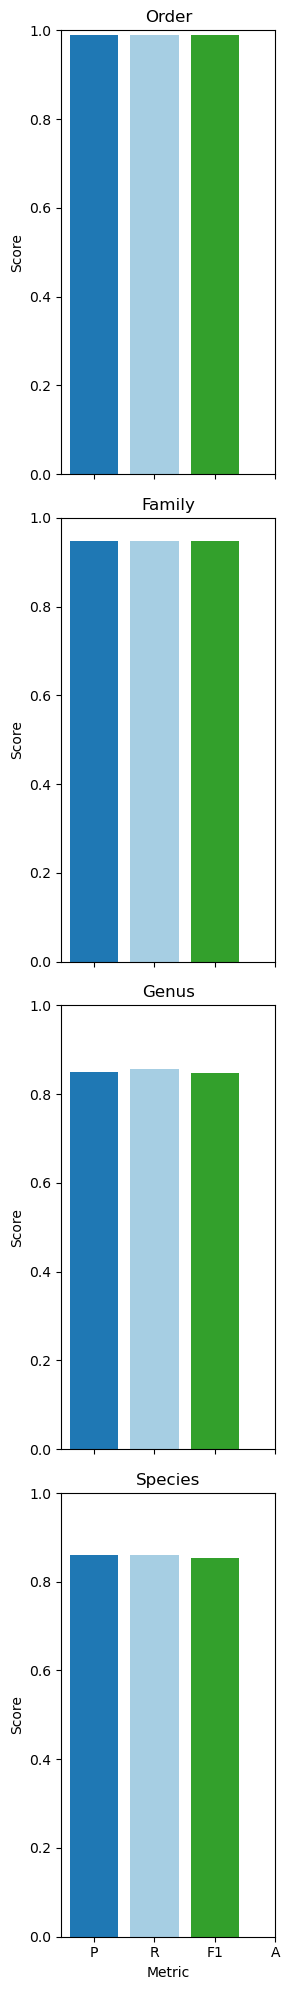

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(3, 20), sharex=True)
my_colors = ["#1f78b4", "#a6cee3", "#33a02c"]  # Precision, Recall, F1-score

for i, taxonomic_level in enumerate(metrics_df.columns):
    axes[i].bar(metrics_df.index, metrics_df[taxonomic_level], color=my_colors)
    axes[i].set_ylabel("Score")
    axes[i].set_ylim(0, 1.0)
    axes[i].set_title(taxonomic_level)

labels = ['P', 'R', 'F1', 'A']

for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)


plt.xlabel("Metric")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [44]:
with open('outputs/Predictions/EPT_reports_conf.pkl', 'rb') as f:
    reports_conf = pickle.load(f)

In [45]:
labels_list = {'order': ['Ephemeroptera', 'Plecoptera', 'Trichoptera'],
               'family': ['Baetidae', 'Caenidae', 'Ephemeridae', 'Nemuridae', 'Limniphilidae', 'Goeridae', 'Leptoceridae'],
               'genus': ['Baetis', 'Caenis', 'Ephemera',
                                   'Amphinemura', 'Nemoura',
                                   'Anabolia', 'Athripsodes', 'Chaetopteryx', 'Goera', 'Halesus', 'Limnephilus', 'Mystacides', 'Potamophylax'],
                'species' : ['Br', 'Bv', 'Ch', 'Ed',
                                       'As', 'Nc',
                                       'An', 'Ac', 'Cv', 'Gp', 'Hr', 'Ll', 'Ma', 'Pr']
}

## Long species: 
# EPT_order = ['Baetis rhodani', 'Baetis vernus', 'Caenis horaria', 'Ephemera danica',
#             'Amphinemura standfussi', 'Nemoura cinerea',
#             'Anabolia nervosa', 'Athripsodes cinereus', 'Chaetopteryx villosa', 'Goera pilosa', 'Halesus radiatus', 'Limnephilus lunatus', 'Mystacides azureus', 'Potamophylax rotundipennis']

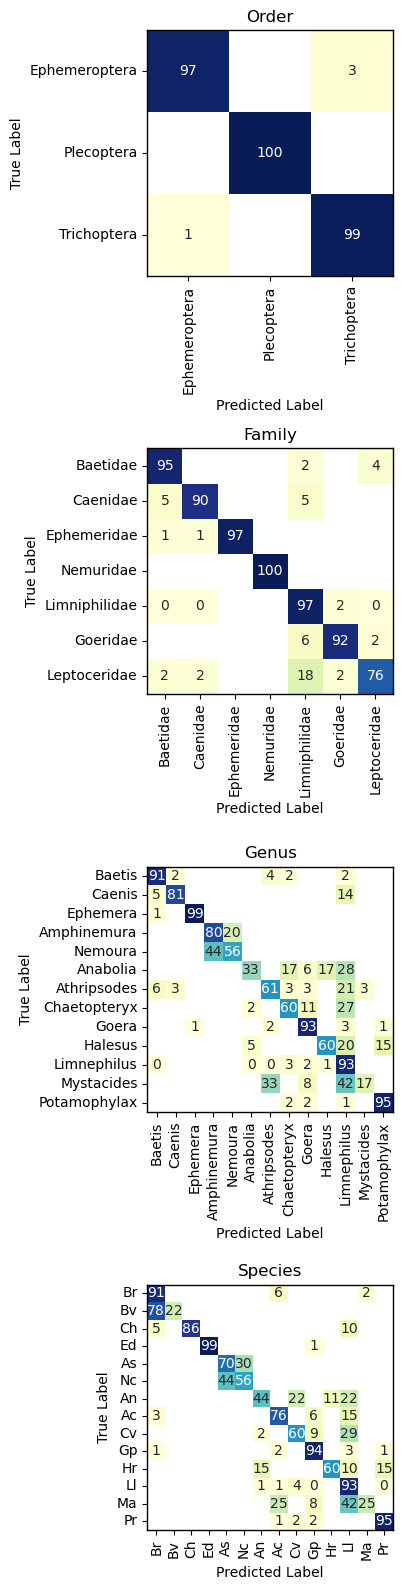

In [46]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(4, 16))

for i, (title, matrix) in enumerate(reports_conf.items()):
    sns.heatmap(matrix, annot=True, cmap='YlGnBu', ax=axes[i], cbar=False, fmt='.0f', mask=(matrix==0)) # optional: linewidth=.5, linecolor='lightgrey'
    axes[i].set_title(title.title())
    axes[i].set_xticklabels(labels_list[title], rotation=90)
    axes[i].set_yticklabels(labels_list[title], rotation=0)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_aspect('equal')

    for _, spine in axes[i].spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)

# Adjust layout
plt.tight_layout()
plt.show()

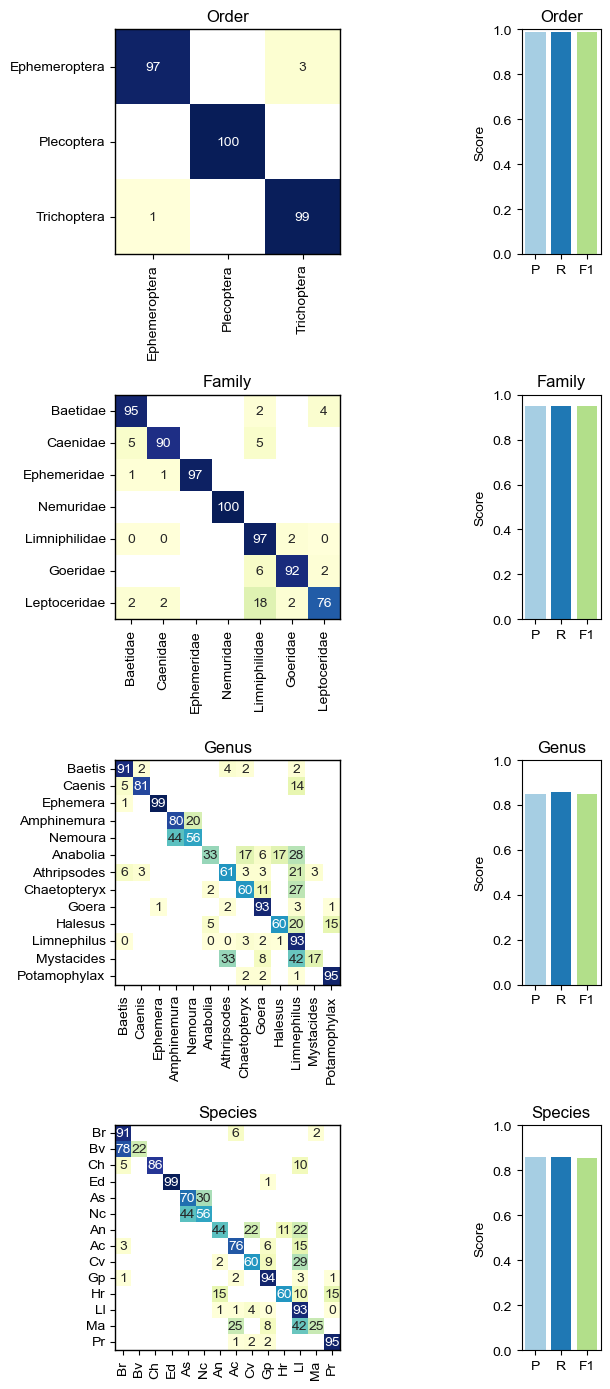

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 14), gridspec_kw={'width_ratios': [10, 1]})

# Plot the first set of heatmaps on the left column
for i, (title, matrix) in enumerate(reports_conf.items()):
    sns.heatmap(matrix, annot=True, cmap='YlGnBu', ax=axes[i,0], cbar=False, fmt='.0f', mask=(matrix==0))
    axes[i,0].set_title(title.title())
    axes[i,0].set_xticklabels(labels_list[title], rotation=90)
    axes[i,0].set_yticklabels(labels_list[title], rotation=0)
    axes[i,0].set_aspect('equal')

    for _, spine in axes[i,0].spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)

# Plot the second set of bar charts on the right column
my_colors = ["#a6cee3", "#1f78b4", "#b2df8a"]  # Precision, Recall, F1-score, Accuracy
labels = ['P', 'R', 'F1']

for i, taxonomic_level in enumerate(metrics_df.columns):
    axes[i,1].bar(metrics_df.index, metrics_df[taxonomic_level], color=my_colors)
    axes[i,1].set_ylabel("Score")
    axes[i,1].set_ylim(0, 1.0)
    axes[i,1].set_title(taxonomic_level)
    axes[i,1].set_xticks(range(len(labels)))
    axes[i,1].set_xticklabels(labels)

plt.xticks(rotation=0)
plt.subplots_adjust(wspace=0)
plt.tight_layout()
plt.savefig('outputs/figures/Classification_CNNs_figure.svg')
plt.savefig('outputs/figures/Classification_CNNs_figure.png')
plt.show()


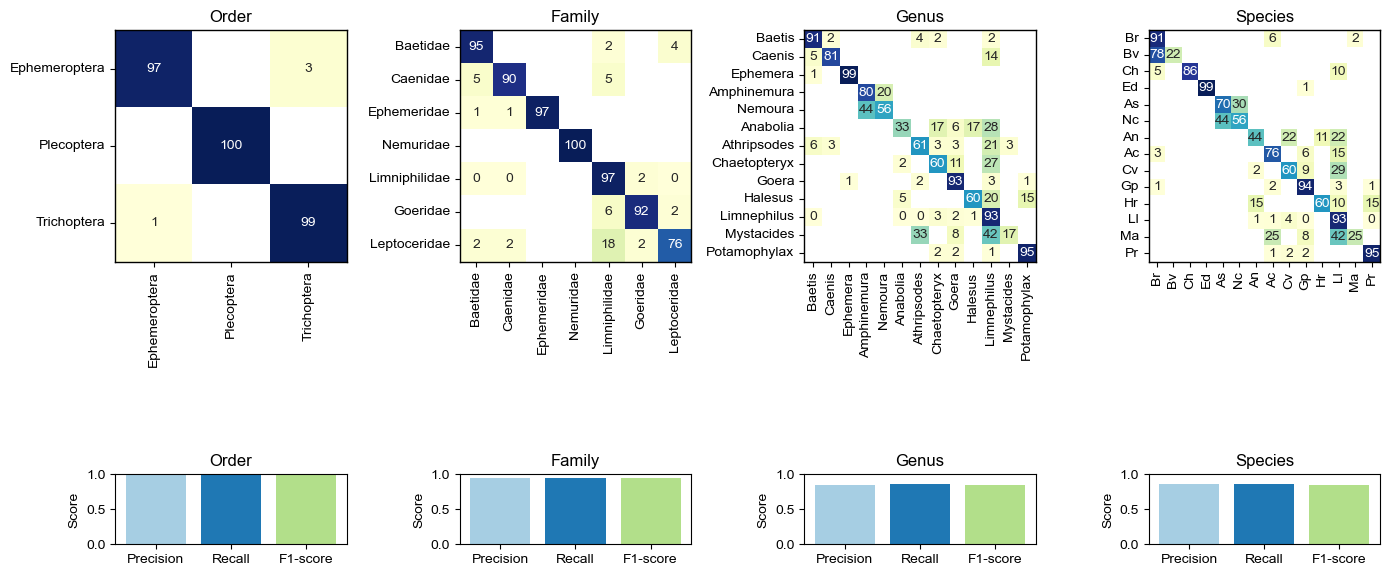

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 8), gridspec_kw={'height_ratios': [10, 1]})

# Plot the first set of heatmaps on the top row
for i, (title, matrix) in enumerate(reports_conf.items()):
    sns.heatmap(matrix, annot=True, cmap='YlGnBu', ax=axes[0, i], cbar=False, fmt='.0f', mask=(matrix == 0))
    axes[0, i].set_title(title.title())
    axes[0, i].set_xticklabels(labels_list[title], rotation=90)
    axes[0, i].set_yticklabels(labels_list[title], rotation=0)
    axes[0, i].set_aspect('equal')

    for _, spine in axes[0, i].spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)

# Plot the second set of bar charts on the bottom row
my_colors = ["#a6cee3", "#1f78b4", "#b2df8a"]  # Precision, Recall, F1-score, Accuracy
labels = ['Precision', 'Recall', 'F1-score']

for i, taxonomic_level in enumerate(metrics_df.columns):
    axes[1, i].bar(metrics_df.index, metrics_df[taxonomic_level], color=my_colors)
    axes[1, i].set_ylabel("Score")
    axes[1, i].set_ylim(0, 1.0)
    axes[1, i].set_title(taxonomic_level)
    axes[1, i].set_xticks(range(len(labels)))
    axes[1, i].set_xticklabels(labels)

plt.xticks(rotation=0)
plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.savefig('outputs/figures/Classification_CNNs_figure_inverted.svg')
plt.savefig('outputs/figures/Classification_CNNs_figure_inverted.png')
plt.show()


In [49]:
# Calculate the number of matches and mismatches for Order CNNs
matches = (predictions_order_classification['Order_DNA'] == predictions_order_classification['y_pred']).sum()
mismatches = (~ (predictions_order_classification['Order_DNA'] == predictions_order_classification['y_pred'])).sum()

total_rows = len(predictions_order_classification)
percent_matches = (matches / total_rows) * 100
percent_mismatches = (mismatches / total_rows) * 100

print(f"Number of matches: {matches}")
print(f"Number of mismatches: {mismatches}")
print(f"Percentage of matches: {percent_matches:.2f}%")
print(f"Percentage of mismatches: {percent_mismatches:.2f}%")

Number of matches: 735
Number of mismatches: 8
Percentage of matches: 98.92%
Percentage of mismatches: 1.08%


In [50]:
# Calculate the number of matches and mismatches for Species CNNs
matches = (predictions_species_classification['Species_DNA'] == predictions_species_classification['y_pred']).sum()
mismatches = (~ (predictions_species_classification['Species_DNA'] == predictions_species_classification['y_pred'])).sum()

total_rows = len(predictions_species_classification)
percent_matches = (matches / total_rows) * 100
percent_mismatches = (mismatches / total_rows) * 100

print(f"Number of matches: {matches}")
print(f"Number of mismatches: {mismatches}")
print(f"Percentage of matches: {percent_matches:.2f}%")
print(f"Percentage of mismatches: {percent_mismatches:.2f}%")

Number of matches: 639
Number of mismatches: 104
Percentage of matches: 86.00%
Percentage of mismatches: 14.00%
